# Mod 5 Project - Capstone
   * Student name: THOMAS J WHIPPLE
   * Student pace: Part-time student
   * Scheduled project review date/time: FRIDAY, JULY 15, 2020, 10:00am
   * Instructor name: JEFF HERMAN 
   * Blog post URL:

How can I use data to improve my local ski mountain?

# Import Necessary Libraries

In [390]:
# Below are the libraries I will use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import folium


# Load the Data

I was given four datasets from Magic Mountain Resort. These are the Liftopia ski ticket data collected from the last four years, 2017 - 2020.

In [391]:
# Liftopia data from 2017
df_2017 = pd.read_csv("Data_Folder/Online Liftopia Magic store Guest sales 10.1.16 to 4.9.17.csv")
df_2017.head()

order_id   ticket_id order_status                              product  \
0  10097099  T110733002    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099  T110733003    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104  T110733016    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104  T110733017    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733  T110735894         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
1           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
2  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
3           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
4           Adult    Liftopia.com  11/15/2016   2/16/2017               No   

     purchaser_address  ... guest_height guest_weight guest_gender  \
0  23 Jefferson Circle  ...          NaN          NaN          NaN   
1  23 Jefferson Circle  ...          NaN          NaN          NaN   
2  23 Jefferson Circle  ...          NaN          NaN          NaN   
3  23 Jefferson Circle  ...          NaN          NaN          NaN   
4                  NaN  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

   guest_equipment_choice  custom_field_question  custom_field_response  
0                     NaN                    NaN                    NaN  
1                     NaN                    NaN                    NaN  
2                     NaN                    NaN                    NaN  
3                     NaN                    NaN                    NaN  
4                     NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [392]:
df_2017.shape

(2819, 28)

In [393]:
# Liftopia data from 2018
df_2018 = pd.read_csv("Data_Folder/Online Liftopia Magic store Guest sales 10.1.17 to 4.8.18.csv")
df_2018.head()

order_id   ticket_id order_status                                product  \
0  10828862  T112041778         PAID  Magic Mountain | Freedom 4-Pack 18/19   
1  10828862  T112041779         PAID  Magic Mountain | Freedom 4-Pack 18/19   
2  10832083  T112047561         PAID  Magic Mountain | Freedom 4-Pack 18/19   
3  10836557  T112055420         PAID    Magic Mountain | 2 Day Lift Tickets   
4  10836557  T112055421         PAID    Magic Mountain | 2 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0           Adult  Magic Mountain   9/29/2017  10/16/2017              Yes   
1           Adult  Magic Mountain   9/29/2017  10/16/2017              Yes   
2           Adult  Magic Mountain   10/2/2017  10/16/2017               No   
3  Youth / Senior    Liftopia.com  10/13/2017  12/26/2017               No   
4           Adult    Liftopia.com  10/13/2017  12/26/2017               No   

       purchaser_address  ... guest_height guest_weight guest_gender  \
0     894 Howard Hill Rd  ...          NaN          NaN          NaN   
1     894 Howard Hill Rd  ...          NaN          NaN          NaN   
2  6180 OLD BRENTFORD CT  ...          NaN          NaN          NaN   
3                    NaN  ...          NaN          NaN          NaN   
4                    NaN  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [394]:
df_2018.shape

(4758, 28)

In [395]:
# Liftopia data from 2019
df_2019 = pd.read_csv("Data_Folder/Online Liftopia Magic Store Guest sales 10.1.18 to 4.7.19.xls.csv")
df_2019.head()

order_id   ticket_id order_status                                product  \
0  11714060  T113603798         PAID  Magic Mountain | Freedom 4-Pack 18/19   
1  11714060  T113603799         PAID  Magic Mountain | Freedom 4-Pack 18/19   
2  11714060  T113603800         PAID  Magic Mountain | Freedom 4-Pack 18/19   
3  11714069  T113603813         PAID  Magic Mountain | Freedom 4-Pack 18/19   
4  11714069  T113603814         PAID  Magic Mountain | Freedom 4-Pack 18/19   

  ticket_type           store order_date   trip_date marketing_opt_in  \
0      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
1      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
2      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
3      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   
4      4-Pack  Magic Mountain  9/15/2018  10/16/2018              Yes   

      purchaser_address  ... guest_height guest_weight guest_gender  \
0  415 E 85th St Apt 9A  ...          NaN          NaN          NaN   
1  415 E 85th St Apt 9A  ...          NaN          NaN          NaN   
2  415 E 85th St Apt 9A  ...          NaN          NaN          NaN   
3     2944 Cambridge rd  ...          NaN          NaN          NaN   
4     2944 Cambridge rd  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [396]:
df_2019.shape

(6745, 28)

In [397]:
# Liftopia data from 2020 - this data set has less since the resort closed early due to Covid-19
df_2020 = pd.read_csv("Data_Folder/Online Liftopia magic store Guests 10.1.19 to 3.15.20.csv")
df_2020.head()

order_id   ticket_id order_status                              product  \
0         NaN         NaN          NaN                                  NaN   
1  12833501.0  T115609601         PAID  Magic Mountain | 1 Day Lift Tickets   
2  12833501.0  T115609602         PAID  Magic Mountain | 1 Day Lift Tickets   
3  12833547.0  T115609703         PAID  Magic Mountain | 1 Day Lift Tickets   
4  12833547.0  T115609704         PAID  Magic Mountain | 1 Day Lift Tickets   

  ticket_type           store order_date  trip_date marketing_opt_in  \
0         NaN             NaN        NaN        NaN              NaN   
1       Adult  Magic Mountain  6/27/2019   2/2/2020               No   
2       Adult  Magic Mountain  6/27/2019   2/2/2020               No   
3       Adult  Magic Mountain  6/27/2019  1/26/2020               No   
4       Adult  Magic Mountain  6/27/2019  1/26/2020               No   

  purchaser_address  ... guest_height guest_weight guest_gender  \
0               NaN  ...          NaN          NaN          NaN   
1      21194 Rt. 22  ...          NaN          NaN          NaN   
2      21194 Rt. 22  ...          NaN          NaN          NaN   
3      21194 Rt. 22  ...          NaN          NaN          NaN   
4      21194 Rt. 22  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [398]:
df_2020.shape

(6188, 28)

In [399]:
# Put the four datasets into one dataframe
data = pd.concat([df_2017, df_2018, df_2019, df_2020], axis=0, sort=False)
data.head()

order_id   ticket_id order_status                              product  \
0  10097099.0  T110733002    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0  T110733003    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0  T110733016    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0  T110733017    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733.0  T110735894         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
1           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
2  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
3           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
4           Adult    Liftopia.com  11/15/2016   2/16/2017               No   

     purchaser_address  ... guest_height guest_weight guest_gender  \
0  23 Jefferson Circle  ...          NaN          NaN          NaN   
1  23 Jefferson Circle  ...          NaN          NaN          NaN   
2  23 Jefferson Circle  ...          NaN          NaN          NaN   
3  23 Jefferson Circle  ...          NaN          NaN          NaN   
4                  NaN  ...          NaN          NaN          NaN   

  guest_ability_level  guest_shoe_size guest_shoe_style  guest_shoe_type  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2                 NaN              NaN              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   

  guest_equipment_choice  custom_field_question  custom_field_response  
0                    NaN                    NaN                    NaN  
1                    NaN                    NaN                    NaN  
2                    NaN                    NaN                    NaN  
3                    NaN                    NaN                    NaN  
4                    NaN                    NaN                    NaN  

[5 rows x 28 columns]

In [400]:
data.shape

(20510, 28)

In [401]:
data.reset_index(drop=True, inplace=True)

# EDA

In [402]:
# Most of the data is categorical
data.describe()

order_id  net_rate_revenue  barcode  guest_height  guest_weight  \
count  2.050900e+04      20506.000000      0.0   1358.000000   1358.000000   
mean   1.223341e+07         51.058487      NaN     66.582474    150.027982   
std    1.151902e+06         24.027872      NaN      5.618835     42.383039   
min    1.009710e+07          1.860000      NaN     43.000000     36.000000   
25%    1.131234e+07         37.390000      NaN     64.000000    121.000000   
50%    1.217216e+07         47.420000      NaN     67.000000    150.000000   
75%    1.324507e+07         57.650000      NaN     71.000000    180.000000   
max    1.428648e+07        261.320000      NaN     82.000000    331.000000   

       guest_shoe_size  
count      1358.000000  
mean          8.990795  
std           2.247431  
min           1.000000  
25%           7.500000  
50%           9.000000  
75%          10.500000  
max          14.500000

In [403]:
# Total of 28 columns
data.columns

Index(['order_id', 'ticket_id', 'order_status', 'product', 'ticket_type',
       'store', 'order_date', 'trip_date', 'marketing_opt_in',
       'purchaser_address', 'purchaser_city', 'purchaser_state',
       'purchaser_zip', 'purchaser_country', 'net_rate_revenue', 'currency',
       'barcode', 'guest_birthdate', 'guest_height', 'guest_weight',
       'guest_gender', 'guest_ability_level', 'guest_shoe_size',
       'guest_shoe_style', 'guest_shoe_type', 'guest_equipment_choice',
       'custom_field_question', 'custom_field_response'],
      dtype='object')

In [404]:
# 20,509 rows with lots of missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20510 entries, 0 to 20509
Data columns (total 28 columns):
order_id                  20509 non-null float64
ticket_id                 20509 non-null object
order_status              20509 non-null object
product                   20509 non-null object
ticket_type               20509 non-null object
store                     20509 non-null object
order_date                20509 non-null object
trip_date                 20509 non-null object
marketing_opt_in          20509 non-null object
purchaser_address         14222 non-null object
purchaser_city            19822 non-null object
purchaser_state           19755 non-null object
purchaser_zip             19819 non-null object
purchaser_country         19798 non-null object
net_rate_revenue          20506 non-null float64
currency                  20509 non-null object
barcode                   0 non-null float64
guest_birthdate           1358 non-null object
guest_height              135

In [405]:
# All the columns that don't have enough information - going to drop
guest_data = ['barcode', 'guest_birthdate', 'guest_height', 'guest_weight', 
              'guest_gender', 'guest_ability_level', 'guest_shoe_size',
              'guest_shoe_style', 'guest_shoe_type', 'guest_equipment_choice',
              'custom_field_question', 'custom_field_response']
df = data.drop(columns = guest_data, axis=0)                
df.head()         

order_id   ticket_id order_status                              product  \
0  10097099.0  T110733002    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0  T110733003    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0  T110733016    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0  T110733017    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733.0  T110735894         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store  order_date   trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
1           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
2  Youth / Senior  Magic Mountain  11/11/2016  12/31/2016              Yes   
3           Adult  Magic Mountain  11/11/2016  12/31/2016              Yes   
4           Adult    Liftopia.com  11/15/2016   2/16/2017               No   

     purchaser_address purchaser_city purchaser_state purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT          6413   
1  23 Jefferson Circle        Clinton              CT          6413   
2  23 Jefferson Circle        Clinton              CT          6413   
3  23 Jefferson Circle        Clinton              CT          6413   
4                  NaN       Guilford              VT          5301   

  purchaser_country  net_rate_revenue currency  
0                US             50.21      USD  
1                US             69.74      USD  
2     United States             50.21      USD  
3     United States             69.74      USD  
4     United States             19.54      USD

### Country

In [406]:
# Check out the different countries where people come from to ski
df['purchaser_country'].value_counts()

US               17374
United States     2303
CA                  41
GB                  26
Canada               8
AU                   7
SE                   5
DK                   5
Australia            4
PR                   4
DO                   4
NO                   3
DE                   3
Brazil               3
NL                   2
BR                   2
Denmark              2
Other                2
Name: purchaser_country, dtype: int64

In [407]:
# We don't need the USA twice!
df['purchaser_country'].replace(to_replace='United States', value='US', inplace=True)

In [408]:
# Check to see if it worked.
df['purchaser_country'].value_counts()

US           19677
CA              41
GB              26
Canada           8
AU               7
DK               5
SE               5
PR               4
Australia        4
DO               4
NO               3
DE               3
Brazil           3
BR               2
NL               2
Denmark          2
Other            2
Name: purchaser_country, dtype: int64

In [409]:
# What are these other places?
# CA is Candada, GB looks like Great Britian... Europe
df.loc[df['purchaser_country'] == 'Other']

order_id   ticket_id order_status  \
5  10099851.0  T110737788    CANCELLED   
6  10099851.0  T110737789    CANCELLED   

                                       product ticket_type           store  \
5  Magic Mountain | 1 Day Lift Ticket + Rental       Adult  Magic Mountain   
6  Magic Mountain | 1 Day Lift Ticket + Rental       Adult  Magic Mountain   

   order_date trip_date marketing_opt_in          purchaser_address  \
5  11/17/2016  1/5/2017              Yes  30 Victoria Gardens South   
6  11/17/2016  1/5/2017              Yes  30 Victoria Gardens South   

  purchaser_city purchaser_state purchaser_zip purchaser_country  \
5   Diego Martin           Other             0             Other   
6   Diego Martin           Other             0             Other   

   net_rate_revenue currency  
5             48.35      USD  
6             48.35      USD

In [410]:
# Get rid of everything that isn't USA
df = df[df['purchaser_country'] == 'US']

In [411]:
# See if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19677 entries, 0 to 20509
Data columns (total 16 columns):
order_id             19677 non-null float64
ticket_id            19677 non-null object
order_status         19677 non-null object
product              19677 non-null object
ticket_type          19677 non-null object
store                19677 non-null object
order_date           19677 non-null object
trip_date            19677 non-null object
marketing_opt_in     19677 non-null object
purchaser_address    14111 non-null object
purchaser_city       19675 non-null object
purchaser_state      19608 non-null object
purchaser_zip        19672 non-null object
purchaser_country    19677 non-null object
net_rate_revenue     19677 non-null float64
currency             19677 non-null object
dtypes: float64(2), object(14)
memory usage: 2.6+ MB


### Other Columns

In [412]:
# What is the Order ID and is it important?
df['order_id'].value_counts()

11006409.0    11
10511636.0     9
10485804.0     9
14046002.0     9
10151249.0     9
              ..
11181119.0     1
14065118.0     1
11443644.0     1
12589735.0     1
11456077.0     1
Name: order_id, Length: 10876, dtype: int64

In [413]:
# Looks like some people make multiple orders, for groups maybe
df[df['order_id'] == 11006409.0].head()

order_id   ticket_id order_status  \
3345  11006409.0  T112358047         PAID   
3346  11006409.0  T112358048         PAID   
3347  11006409.0  T112358049         PAID   
3348  11006409.0  T112358050         PAID   
3349  11006409.0  T112358051         PAID   

                                  product     ticket_type           store  \
3345  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3346  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3347  Magic Mountain | 1 Day Lift Tickets           Adult  Magic Mountain   
3348  Magic Mountain | 1 Day Lift Tickets  Youth / Senior  Magic Mountain   
3349  Magic Mountain | 1 Day Lift Tickets  Youth / Senior  Magic Mountain   

      order_date   trip_date marketing_opt_in purchaser_address  \
3345  12/26/2017  12/27/2017               No         37 Brooks   
3346  12/26/2017  12/27/2017               No         37 Brooks   
3347  12/26/2017  12/27/2017               No         37 Brooks   
3348  12/26/2017  12/27/2017               No         37 Brooks   
3349  12/26/2017  12/27/2017               No         37 Brooks   

     purchaser_city purchaser_state purchaser_zip purchaser_country  \
3345     New Canaan              CT          6840                US   
3346     New Canaan              CT          6840                US   
3347     New Canaan              CT          6840                US   
3348     New Canaan              CT          6840                US   
3349     New Canaan              CT          6840                US   

      net_rate_revenue currency  
3345             50.21      USD  
3346             50.21      USD  
3347             50.21      USD  
3348             39.98      USD  
3349             39.98      USD

In [414]:
# And Ticket ID?
df['ticket_id'].value_counts()

T113273970    1
T113001330    1
T112839856    1
T117584252    1
T115427239    1
             ..
T112952585    1
T111838305    1
T117858640    1
T114774988    1
T111531998    1
Name: ticket_id, Length: 19677, dtype: int64

In [415]:
# Since all are unique they don't seem important
df = df.drop(['ticket_id'], axis = 1)

In [416]:
# What is Order Status?
df['order_status'].value_counts()

PAID         19189
CANCELLED      488
Name: order_status, dtype: int64

### Product Types

In [417]:
# Not sure of the difference between Magic and Liftopia
df['store'].value_counts()

Magic Mountain    14118
Liftopia.com       5559
Name: store, dtype: int64

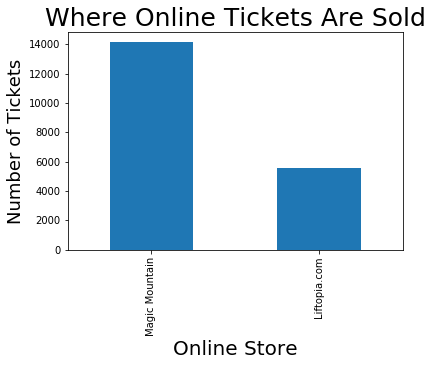

In [418]:
df['store'].value_counts().plot(kind='bar')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Online Store", fontsize=20)
plt.title('Where Online Tickets Are Sold', fontsize=25)
plt.show()
# Or like this:
#df.groupby('store').size().plot(kind='bar')

In [419]:
# Look at the different possible products
df['product'].value_counts()

Magic Mountain | 1 Day Lift Tickets                                          14651
Magic Mountain | 2 Day Lift Tickets                                           1915
Magic Mountain | 1 Day Lift Ticket + Rental                                   1170
Magic Mountain | All Day Tubing                                                761
Magic Mountain | 3 Day Lift Tickets                                            417
Magic Mountain | 2 Day Lift Ticket + Rental                                    362
Magic Mountain | 1 Day Lift Ticket + Tubing                                    258
Magic Mountain | 3 Day Lift Ticket + Rental                                     45
Magic Mountain | 2019/20 Freedom 4-Pack                                         36
Magic Mountain | Freedom 4-Pack 18/19                                           36
Magic Mountain | Winter 19-20 Single Day Flexible Tickets | Valid Any Day       17
Magic Mountain | Winter 18-19 Single Day Flexible Tickets | Valid Any Day        9
Name

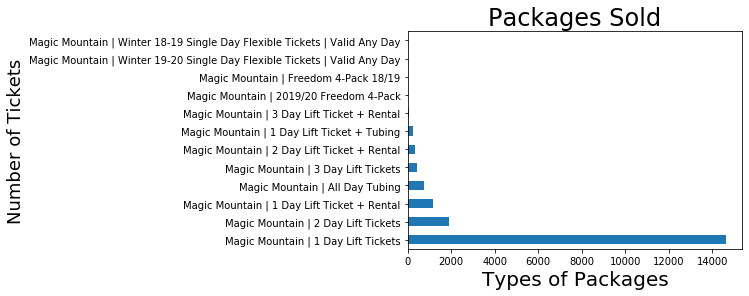

In [420]:
# Get a visual
df['product'].value_counts().plot(kind="barh")
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Types of Packages", fontsize=20)
plt.title('Packages Sold', fontsize=24)
plt.show()

In [421]:
# Total number of rentals bought with tickets
rentals = df[(df['product'] == 'Magic Mountain | 1 Day Lift Ticket + Rental') |
             (df['product'] == 'Magic Mountain | 2 Day Lift Ticket + Rental') |
             (df['product'] == 'Magic Mountain | 3 Day Lift Ticket + Rental')].count()

In [422]:
# Rentals as a percent
print("Total percent of online rentals bought", 
      round(rentals['product']/len(df['product'])*100,2),'%')

Total percent of online rentals bought 8.01 %


In [423]:
# Check out Ticket Types
df['ticket_type'].value_counts()

Adult             13873
Youth / Senior     4976
All Ages            761
4-Pack               67
Name: ticket_type, dtype: int64

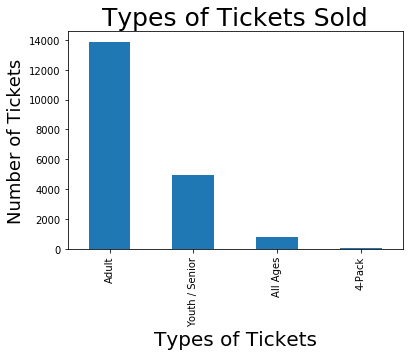

In [424]:
# Graph Ticket Types - looks like it's about 75% "Adult"
df['ticket_type'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Types of Tickets", fontsize=20)
plt.title('Types of Tickets Sold', fontsize=25)
plt.show()

## Ticket Time

#### Order Time

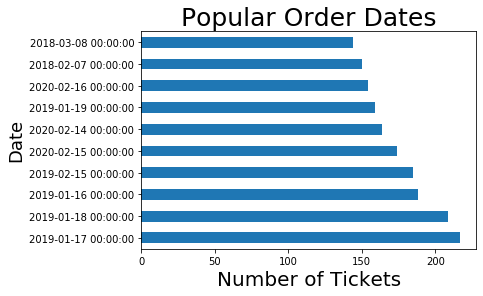

In [907]:
# When are people 'thinking' and 'planning' their ski trips?
df['order_date'].value_counts()[0:10].plot(kind='barh')
plt.ylabel("Date",fontsize=18)
plt.xlabel("Number of Tickets", fontsize=20)
plt.title('Popular Order Dates', fontsize=25)
plt.show()

In [426]:
# Looks like MLK Weekend, Presidents Day Weekend, Feburary Break

#### Trip Time

In [427]:
# Still not in datetime...
df['trip_date'].value_counts()

1/20/2019     472
2/15/2020     383
2/16/2020     357
1/19/2019     348
1/19/2020     344
             ... 
12/6/2016       2
12/17/2016      2
12/18/2016      2
3/2/2017        1
3/30/2017       1
Name: trip_date, Length: 298, dtype: int64

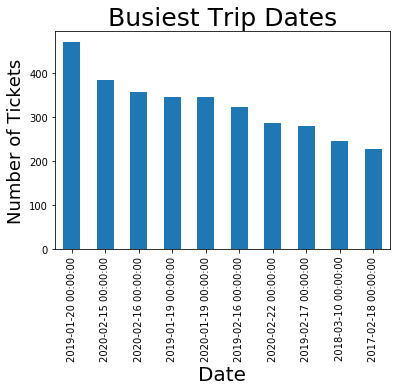

In [910]:
# What are the busiest dates?
df['trip_date'].value_counts()[0:10].plot(kind='bar')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Date", fontsize=20)
plt.title('Busiest Trip Dates', fontsize=25)
plt.show()

#### Order Trip Time Difference

In [429]:
# Change date types to datetime %Y-%m-%d
df['order_date'] = pd.to_datetime(df['order_date'])
df['trip_date'] = pd.to_datetime(df['trip_date'])

In [430]:
# Check to see if it worked
df['trip_date'].head()

0   2016-12-31
1   2016-12-31
2   2016-12-31
3   2016-12-31
4   2017-02-16
Name: trip_date, dtype: datetime64[ns]

In [431]:
# Create new column with the difference between order date and ticket date
df['order_to_trip_days'] = (df['trip_date'] - df['order_date']).dt.days

In [432]:
# Look at these stats
df['order_to_trip_days'].describe()

count    19677.000000
mean         7.524928
std         16.735216
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        227.000000
Name: order_to_trip_days, dtype: float64

In [433]:
difference = df['order_to_trip_days']

In [434]:
difference

0        50
1        50
2        50
3        50
4        93
         ..
20505     1
20506     1
20507     1
20508     1
20509     1
Name: order_to_trip_days, Length: 19677, dtype: int64

In [435]:
# Look for three standard deviations above the mean
diff_outliers = difference.mean() + 3*difference.std()
# Count how many rows are outliers
print("Number of outliers:", (difference > diff_outliers).sum())
# Remove outliers from the data
difference = difference[difference < diff_outliers]
difference.describe()

Number of outliers: 492


count    19185.000000
mean         5.315559
std          8.102662
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         57.000000
Name: order_to_trip_days, dtype: float64

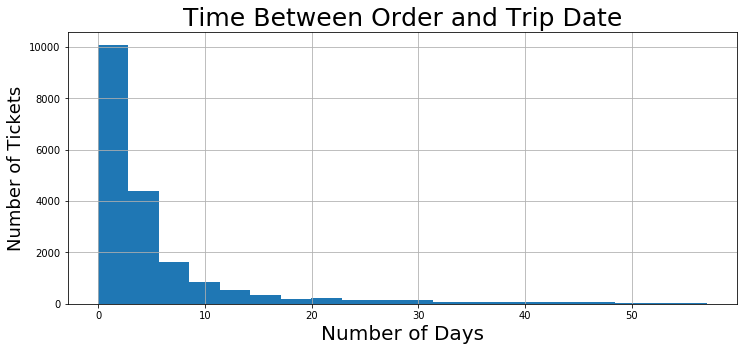

In [919]:
# Looks like most people buy tickets 1 or 2 days before they go skiing.
difference.hist(figsize =(12,5), bins=20)
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Number of Days", fontsize=20)
plt.title('Time Between Order and Trip Date', fontsize=25)
plt.show()

In [437]:
# Perhaps I need to look at the difference of Liftopia vs Magic?

In [438]:
# Look at a map of distance from resort based on order_to_trip

## Zip Code

In [439]:
# Some of the zip codes are written with extra four digits
df['purchaser_zip'][25:35]

30          7063
31    01053-9100
32    01053-9100
33         33837
34         33837
35         33837
36         33837
37         33837
38         33837
39          5253
Name: purchaser_zip, dtype: object

In [440]:
# Look at the different zip codes
df['purchaser_zip'].value_counts()

6824          194
6443          182
6424          166
5301          113
6084          111
             ... 
48075           1
5039            1
01109-____      1
3842            1
13492           1
Name: purchaser_zip, Length: 2575, dtype: int64

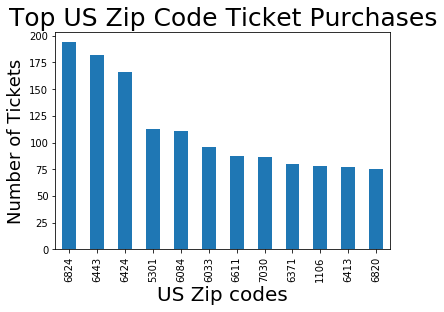

In [441]:
# Top ten zip codes where skiiers come from
df['purchaser_zip'].value_counts()[:12].plot(kind='bar')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("US Zip codes", fontsize=20)
plt.title('Top US Zip Code Ticket Purchases', fontsize=25)
plt.show()

In [442]:
# There are some missing zip codes!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19677 entries, 0 to 20509
Data columns (total 16 columns):
order_id              19677 non-null float64
order_status          19677 non-null object
product               19677 non-null object
ticket_type           19677 non-null object
store                 19677 non-null object
order_date            19677 non-null datetime64[ns]
trip_date             19677 non-null datetime64[ns]
marketing_opt_in      19677 non-null object
purchaser_address     14111 non-null object
purchaser_city        19675 non-null object
purchaser_state       19608 non-null object
purchaser_zip         19672 non-null object
purchaser_country     19677 non-null object
net_rate_revenue      19677 non-null float64
currency              19677 non-null object
order_to_trip_days    19677 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(1), object(11)
memory usage: 2.6+ MB


In [443]:
# First I need to get rid of the NaN's
df.dropna(subset=['purchaser_zip'], inplace=True)

In [444]:
# Split the zip codes and get rid of the extra four digits
df['purchaser_zip'] = df['purchaser_zip'].map(lambda x: x.split('-')[0])

In [445]:
# Check to see if it worked
df['purchaser_zip'][25:35]

30     7063
31    01053
32    01053
33    33837
34    33837
35    33837
36    33837
37    33837
38    33837
39     5253
Name: purchaser_zip, dtype: object

In [446]:
# # One of the random zip codes people entered!
df.replace(to_replace='O6073', value='06073', inplace=True)

In [447]:
# Another of the random zip codes people entered!
df.replace(to_replace='us, 05359', value='05359', inplace=True)

In [448]:
# Again of the random zip codes people entered!
df.replace(to_replace='us, 06489', value='06489', inplace=True)

In [449]:
# Another of the random zip codes people entered!
df.replace(to_replace='10506`\\', value='10506', inplace=True)

In [450]:
# Last one of the random zip codes people entered!
df.replace(to_replace='us, 12508', value='12508', inplace=True)

In [451]:
# Last one of the random zip codes people entered!
df.replace(to_replace='112384883', value='11238', inplace=True)

In [452]:
# Last one of the random zip codes people entered!
df.replace(to_replace='88763920', value='8876', inplace=True)

In [453]:
# Last one of the random zip codes people entered!
df.replace(to_replace='2039935884', value='06612', inplace=True)

In [454]:
# Last one of the random zip codes people entered!
df.replace(to_replace='111214', value='11214', inplace=True)

In [455]:
# Last one of the random zip codes people entered!
df.replace(to_replace='10604216', value='1060', inplace=True)

In [456]:
# Change the zip codes into integers
df.purchaser_zip = df.purchaser_zip.astype(int)

In [457]:
df.purchaser_zip.describe()

count    19672.000000
mean      8939.264437
std      10626.034422
min          0.000000
25%       3608.000000
50%       6525.000000
75%      11101.000000
max      98629.000000
Name: purchaser_zip, dtype: float64

In [458]:
df.loc[df.purchaser_zip > 99999]

Empty DataFrame
Columns: [order_id, order_status, product, ticket_type, store, order_date, trip_date, marketing_opt_in, purchaser_address, purchaser_city, purchaser_state, purchaser_zip, purchaser_country, net_rate_revenue, currency, order_to_trip_days]
Index: []

### Zip Code Map

In [62]:
# Zip code info from zipcode database
# https://www.unitedstateszipcodes.org/zip-code-database/

latlong_codes = pd.read_csv("Data_Folder/zip_code_database.csv")
latlong_codes.head()

zip      type  decommissioned primary_city acceptable_cities  \
0  501    UNIQUE               0   Holtsville               NaN   
1  544    UNIQUE               0   Holtsville               NaN   
2  601  STANDARD               0     Adjuntas               NaN   
3  602  STANDARD               0       Aguada               NaN   
4  603  STANDARD               0    Aguadilla             Ramey   

                                 unacceptable_cities state  \
0                               I R S Service Center    NY   
1                                 Irs Service Center    NY   
2  Colinas Del Gigante, Jard De Adjuntas, Urb San...    PR   
3  Alts De Aguada, Bo Guaniquilla, Comunidad Las ...    PR   
4  Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...    PR   

                county             timezone area_codes world_region country  \
0       Suffolk County     America/New_York        631          NaN      US   
1       Suffolk County     America/New_York        631          NaN      US   
2   Adjuntas Municipio  America/Puerto_Rico    787,939          NaN      US   
3     Aguada Municipio  America/Puerto_Rico    787,939          NaN      US   
4  Aguadilla Municipio  America/Puerto_Rico        787          NaN      US   

   latitude  longitude  irs_estimated_population_2015  
0     40.81     -73.04                            562  
1     40.81     -73.04                              0  
2     18.16     -66.72                              0  
3     18.38     -67.18                              0  
4     18.43     -67.15                              0

In [63]:
# I just want the zipcodes and the lat/lon
latlong_codes = latlong_codes.filter(['zip','latitude', 'longitude'], axis=1)
latlong_codes.head()

zip  latitude  longitude
0  501     40.81     -73.04
1  544     40.81     -73.04
2  601     18.16     -66.72
3  602     18.38     -67.18
4  603     18.43     -67.15

In [124]:
# Merge the lat and lon with my original dataframe
skiier_map = df.merge(latlong_codes, left_on='purchaser_zip', right_on='zip')
skiier_map.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10402020.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2017-01-23 2017-01-28               No   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT           6413   
1  23 Jefferson Circle        Clinton              CT           6413   
2  23 Jefferson Circle        Clinton              CT           6413   
3  23 Jefferson Circle        Clinton              CT           6413   
4                  NaN        Clinton              CT           6413   

  purchaser_country  net_rate_revenue currency  order_to_trip_days   zip  \
0                US             50.21      USD                  50  6413   
1                US             69.74      USD                  50  6413   
2                US             50.21      USD                  50  6413   
3                US             69.74      USD                  50  6413   
4                US             40.79      USD                   5  6413   

   latitude  longitude  
0     41.27     -72.53  
1     41.27     -72.53  
2     41.27     -72.53  
3     41.27     -72.53  
4     41.27     -72.53

In [65]:
# Create a new df with unique zip codes
df_zip = skiier_map.drop_duplicates(subset='purchaser_zip')

In [66]:
# How many different zip codes are there
df_zip.shape

(2387, 19)

#### All Unique Zip Code Map

In [67]:
# Find out where these zip codes are located
map_zipcodes = folium.Map([41.4090, -75.6624],zoom_start=6, min_zoom=6, 
                    width=800,height=600)

icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_zipcodes)

# Location by Zip code
for lat, lon in zip(df_zip['latitude'], df_zip['longitude']):
     folium.CircleMarker([lat, lon], radius=2, color='crimson',
    fill=False).add_to(map_zipcodes)

map_zipcodes

#### Heat Map

In [924]:
# Trying to look at a heat map of purchases based on zip code

from folium import plugins
from folium.plugins import HeatMap

# Find out where these zip codes are located
map_heat = folium.Map([42.3232, -72.6547],zoom_start=8, 
                    width=800,height=900)

# Fun Resort Icon
icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_heat)

# Convert to (n, 2) nd-array format for heatmap
#zipArr = skiier_map[['latitude', 'longitude']].as_matrix()

# Old method is depreciated, use this now
zipArr = skiier_map[['latitude', 'longitude']].values

# plot heatmap
map_heat .add_child(plugins.HeatMap(zipArr, radius=15))

map_heat 

#### Yearly Map

In [69]:
# Looking for ways to differentiate the years

In [70]:
# Create a new df with unique zip codes for 2017
date_range = (skiier_map['trip_date'] > '2016-10-1') & (skiier_map['trip_date'] <= '2017-4-9')
skiiers_2017 = skiier_map.loc[date_range]
skiiers_2017_zipcodes = skiiers_2017.drop_duplicates(subset='purchaser_zip')
skiiers_2017_zipcodes.shape

(776, 19)

In [106]:
skiiers_2017_zipcodes.head()

order_id order_status                                      product  \
0    10097099.0    CANCELLED          Magic Mountain | 2 Day Lift Tickets   
77   10098733.0         PAID          Magic Mountain | 1 Day Lift Tickets   
190  10101684.0    CANCELLED          Magic Mountain | 1 Day Lift Tickets   
195  10105009.0         PAID          Magic Mountain | 3 Day Lift Tickets   
236  10106627.0    CANCELLED  Magic Mountain | 1 Day Lift Ticket + Rental   

        ticket_type           store order_date  trip_date marketing_opt_in  \
0    Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
77            Adult    Liftopia.com 2016-11-15 2017-02-16               No   
190           Adult  Magic Mountain 2016-11-20 2016-12-31               No   
195           Adult  Magic Mountain 2016-11-23 2017-02-17              Yes   
236  Youth / Senior  Magic Mountain 2016-11-25 2016-12-28               No   

        purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
0     23 Jefferson Circle         Clinton              CT           6413   
77                    NaN        Guilford              VT           5301   
190   117 Feedwater Court    Stewartstown              PA          17363   
195  1128 Lawrence Avenue  Point Pleasant              NJ           8742   
236   110 Chardonnay Lane         Tolland              CT           6084   

    purchaser_country  net_rate_revenue currency  order_to_trip_days    zip  \
0                  US             50.21      USD                  50   6413   
77                 US             19.54      USD                  93   5301   
190                US             42.77      USD                  41  17363   
195                US            118.10      USD                  86   8742   
236                US             56.72      USD                  33   6084   

     latitude  longitude  
0       41.27     -72.53  
77      42.86     -72.57  
190     39.75     -76.59  
195     40.09     -74.04  
236     41.88     -72.36

In [71]:
# Create a new df with unique zip codes for 2018
date_range = (skiier_map['trip_date'] > '2017-10-1') & (skiier_map['trip_date'] <= '2018-4-8')
skiiers_2018 = skiier_map.loc[date_range]
skiiers_2018_zipcodes = skiiers_2018.drop_duplicates(subset='purchaser_zip')
skiiers_2018_zipcodes.shape

(1156, 19)

In [72]:
# Create a new df with unique zip codes for 2019
date_range = (skiier_map['trip_date'] > '2018-10-1') & (skiier_map['trip_date'] <= '2019-4-7')
skiiers_2019 = skiier_map.loc[date_range]
skiiers_2019_zipcodes = skiiers_2019.drop_duplicates(subset='purchaser_zip')
skiiers_2019_zipcodes.shape

(1341, 19)

In [73]:
# Create a new df with unique zip codes for 2020
date_range = (skiier_map['trip_date'] > '2019-10-1') & (skiier_map['trip_date'] <= '2020-3-15')
skiiers_2020 = skiier_map.loc[date_range]
skiiers_2020_zipcodes = skiiers_2020.drop_duplicates(subset='purchaser_zip')
skiiers_2020_zipcodes.shape

(1315, 19)

In [74]:
# Create map of data by year
# How can I filter it by year?

# Map by year overlapping
map_yearly = folium.Map([41.4090, -75.6624],zoom_start=6, min_zoom=6, 
                    width=800,height=600)

# Fun Ski Resort Icon
icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_yearly)

# Location by Zip code
for lat, lon in zip(skiiers_2017_zipcodes['latitude'], skiiers_2017_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=9, color='crimson',
    fill=False).add_to(map_yearly)
        
for lat, lon in zip(skiiers_2018_zipcodes['latitude'], skiiers_2018_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=7, color='purple',
    fill=False).add_to(map_yearly)        

for lat, lon in zip(skiiers_2019_zipcodes['latitude'], skiiers_2019_zipcodes['longitude']):
    folium.CircleMarker([lat, lon], radius=5, color='green',
    fill=False).add_to(map_yearly) 
    
# Won't load with all four years.      
#for lat, lon in zip(skiiers_2020_zipcodes['latitude'], skiiers_2020_zipcodes['longitude']):
#    folium.CircleMarker([lat, lon], radius=2, color='orange',
#    fill=False).add_to(map_yearly)    
        
map_yearly

#### Clustered Map

In [938]:
from folium import plugins
from folium.plugins import MarkerCluster

# Find out where these zip codes are located
map_cluster = folium.Map([38.9072, -77.0369], zoom_start=5, min_zoom=5, 
                         width=500, height=800)


icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_cluster)

# Convert to (n, 2) nd-array format for heatmap
#zipArr = skiier_map[['latitude', 'longitude']].as_matrix()

# Old method is depreciated, use this now
zipArr = df_zip[['latitude', 'longitude']].values

# plot cluster
map_cluster.add_child(plugins.MarkerCluster(zipArr, radius=15))

map_cluster

In [76]:
"""
import branca


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = f'{url}/us_county_data.csv'
county_geo = f'{url}/us_counties_20m_topo.json'


df = pd.read_csv(county_data, na_values=[' '])

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)
employed_series = df.set_index('FIPS_Code')['Employed_2011']


def style_function(feature):
    employed = employed_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if employed is None else colorscale(employed)
    }


m = folium.Map(
    location=[48, -102],
    tiles='cartodbpositron',
    zoom_start=3
)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(m)


m
"""

"\nimport branca\n\n\nurl = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'\ncounty_data = f'{url}/us_county_data.csv'\ncounty_geo = f'{url}/us_counties_20m_topo.json'\n\n\ndf = pd.read_csv(county_data, na_values=[' '])\n\ncolorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)\nemployed_series = df.set_index('FIPS_Code')['Employed_2011']\n\n\ndef style_function(feature):\n    employed = employed_series.get(int(feature['id'][-5:]), None)\n    return {\n        'fillOpacity': 0.5,\n        'weight': 0,\n        'fillColor': '#black' if employed is None else colorscale(employed)\n    }\n\n\nm = folium.Map(\n    location=[48, -102],\n    tiles='cartodbpositron',\n    zoom_start=3\n)\n\nfolium.TopoJson(\n    json.loads(requests.get(county_geo).text),\n    'objects.us_counties_20m',\n    style_function=style_function\n).add_to(m)\n\n\nm\n"

## Addresses

#### By city

In [459]:
df['purchaser_city'].value_counts()

New York            466
Brooklyn            379
Fairfield           240
Boston              178
Madison             175
                   ... 
Wilmot                1
WEST STOCKBRIDGE      1
fairless hills        1
Centreville           1
niskayuna             1
Name: purchaser_city, Length: 2514, dtype: int64

In [460]:
df['purchaser_city'].value_counts()

New York            466
Brooklyn            379
Fairfield           240
Boston              178
Madison             175
                   ... 
Wilmot                1
WEST STOCKBRIDGE      1
fairless hills        1
Centreville           1
niskayuna             1
Name: purchaser_city, Length: 2514, dtype: int64

In [461]:
df['purchaser_city'].value_counts()

New York            466
Brooklyn            379
Fairfield           240
Boston              178
Madison             175
                   ... 
Wilmot                1
WEST STOCKBRIDGE      1
fairless hills        1
Centreville           1
niskayuna             1
Name: purchaser_city, Length: 2514, dtype: int64

In [462]:
df['purchaser_city'] = df['purchaser_city'].str.title()

In [463]:
df['purchaser_city'].value_counts()

New York           508
Brooklyn           453
Fairfield          280
Madison            202
Boston             192
                  ... 
Port Republic        1
Thornton             1
West Brandywine      1
Colonie              1
Farming Dale         1
Name: purchaser_city, Length: 1921, dtype: int64

In [971]:
df['purchaser_city'].isnull().sum()

0

#### By state

In [464]:
df.purchaser_state.value_counts().head()

CT    5191
NY    4224
MA    3968
NJ    2169
PA     924
Name: purchaser_state, dtype: int64

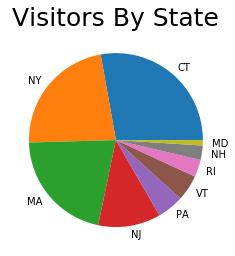

In [989]:
df.purchaser_state.value_counts()[0:9].plot(kind='pie')
plt.ylabel("",fontsize=18)
plt.title('Visitors By State', fontsize=25)
plt.show()

In [465]:
# Looks like almost all fifty states visit Magic!
df.purchaser_state.value_counts().count()

48

In [972]:
df.purchaser_state.isnull().sum()

64

In [1008]:
# Zip code info from zipcode database
# https://www.unitedstateszipcodes.org/zip-code-database/

state_codes = pd.read_csv("Data_Folder/zip_code_database.csv")
state_codes.head()

zip      type  decommissioned primary_city acceptable_cities  \
0  501    UNIQUE               0   Holtsville               NaN   
1  544    UNIQUE               0   Holtsville               NaN   
2  601  STANDARD               0     Adjuntas               NaN   
3  602  STANDARD               0       Aguada               NaN   
4  603  STANDARD               0    Aguadilla             Ramey   

                                 unacceptable_cities state  \
0                               I R S Service Center    NY   
1                                 Irs Service Center    NY   
2  Colinas Del Gigante, Jard De Adjuntas, Urb San...    PR   
3  Alts De Aguada, Bo Guaniquilla, Comunidad Las ...    PR   
4  Bda Caban, Bda Esteves, Bo Borinquen, Bo Ceiba...    PR   

                county             timezone area_codes world_region country  \
0       Suffolk County     America/New_York        631          NaN      US   
1       Suffolk County     America/New_York        631          NaN      US   
2   Adjuntas Municipio  America/Puerto_Rico    787,939          NaN      US   
3     Aguada Municipio  America/Puerto_Rico    787,939          NaN      US   
4  Aguadilla Municipio  America/Puerto_Rico        787          NaN      US   

   latitude  longitude  irs_estimated_population_2015  
0     40.81     -73.04                            562  
1     40.81     -73.04                              0  
2     18.16     -66.72                              0  
3     18.38     -67.18                              0  
4     18.43     -67.15                              0

In [1009]:
# I just want the zipcodes and the lat/lon
state_codes = state_codes.filter(['zip', 'primary_city', 'state', 'latitude', 'longitude'], axis=1)
state_codes.head()

zip primary_city state  latitude  longitude
0  501   Holtsville    NY     40.81     -73.04
1  544   Holtsville    NY     40.81     -73.04
2  601     Adjuntas    PR     18.16     -66.72
3  602       Aguada    PR     18.38     -67.18
4  603    Aguadilla    PR     18.43     -67.15

In [1010]:
# Merge the lat and lon with my original dataframe
df_skiiers = df.merge(state_codes, left_on='purchaser_zip', right_on='zip')
df_skiiers.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10402020.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2017-01-23 2017-01-28               No   

     purchaser_address purchaser_city  ... purchaser_zip  purchaser_country  \
0  23 Jefferson Circle        Clinton  ...          6413                 US   
1  23 Jefferson Circle        Clinton  ...          6413                 US   
2  23 Jefferson Circle        Clinton  ...          6413                 US   
3  23 Jefferson Circle        Clinton  ...          6413                 US   
4                  NaN        Clinton  ...          6413                 US   

  net_rate_revenue  currency order_to_trip_days   zip  primary_city state  \
0            50.21       USD                 50  6413       Clinton    CT   
1            69.74       USD                 50  6413       Clinton    CT   
2            50.21       USD                 50  6413       Clinton    CT   
3            69.74       USD                 50  6413       Clinton    CT   
4            40.79       USD                  5  6413       Clinton    CT   

  latitude  longitude  
0    41.27     -72.53  
1    41.27     -72.53  
2    41.27     -72.53  
3    41.27     -72.53  
4    41.27     -72.53  

[5 rows x 21 columns]

In [1011]:
df_skiiers = df_skiiers.drop(['order_status', 'marketing_opt_in', 'purchaser_country', 'currency'], axis=1)

In [1012]:
df_skiiers[df_skiiers.purchaser_state.isnull()]

order_id                              product     ticket_type  \
12685  14179376.0  Magic Mountain | 1 Day Lift Tickets           Adult   
12686  14179376.0  Magic Mountain | 1 Day Lift Tickets  Youth / Senior   
12687  14179376.0  Magic Mountain | 1 Day Lift Tickets  Youth / Senior   
15760  14235476.0  Magic Mountain | 1 Day Lift Tickets           Adult   
17541  14136994.0      Magic Mountain | All Day Tubing        All Ages   
19574  14220109.0  Magic Mountain | 1 Day Lift Tickets           Adult   

                store order_date  trip_date       purchaser_address  \
12685  Magic Mountain 2020-03-01 2020-03-06     7 Driftway Point Rd   
12686  Magic Mountain 2020-03-01 2020-03-06     7 Driftway Point Rd   
12687  Magic Mountain 2020-03-01 2020-03-06     7 Driftway Point Rd   
15760  Magic Mountain 2020-03-07 2020-03-08     150 Furnace Hill Rd   
17541  Magic Mountain 2020-02-26 2020-02-29          63 Pleasant St   
19574  Magic Mountain 2020-03-06 2020-03-07  2754 S Linebarger Terr   

      purchaser_city purchaser_state  purchaser_zip  net_rate_revenue  \
12685        Danbury             NaN           6811             42.77   
12686        Danbury             NaN           6811             26.03   
12687        Danbury             NaN           6811             27.89   
15760       Cheshire             NaN           1225             53.00   
17541       Winthrop             NaN           2152             23.24   
19574      Milwaukee             NaN          53207             57.65   

       order_to_trip_days    zip primary_city state  latitude  longitude  
12685                   5   6811      Danbury    CT     41.42     -73.48  
12686                   5   6811      Danbury    CT     41.42     -73.48  
12687                   5   6811      Danbury    CT     41.42     -73.48  
15760                   1   1225     Cheshire    MA     42.55     -73.15  
17541                   3   2152     Winthrop    MA     42.37     -70.98  
19574                   1  53207    Milwaukee    WI     42.98     -87.90

In [1013]:
df.purchaser_state.fillna(df_skiiers.state, inplace=True)

In [1014]:
df.purchaser_state.isnull().sum()

6

In [999]:
df[df.purchaser_state.isnull()]

order_id order_status                              product  \
19808  14136994.0         PAID      Magic Mountain | All Day Tubing   
20039  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20040  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20041  14179376.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20285  14220109.0         PAID  Magic Mountain | 1 Day Lift Tickets   
20346  14235476.0         PAID  Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
19808        All Ages  Magic Mountain 2020-02-26 2020-02-29               No   
20039           Adult  Magic Mountain 2020-03-01 2020-03-06               No   
20040  Youth / Senior  Magic Mountain 2020-03-01 2020-03-06               No   
20041  Youth / Senior  Magic Mountain 2020-03-01 2020-03-06               No   
20285           Adult  Magic Mountain 2020-03-06 2020-03-07               No   
20346           Adult  Magic Mountain 2020-03-07 2020-03-08               No   

            purchaser_address purchaser_city purchaser_state  purchaser_zip  \
19808          63 Pleasant St       Winthrop             NaN           2152   
20039     7 Driftway Point Rd        Danbury             NaN           6811   
20040     7 Driftway Point Rd        Danbury             NaN           6811   
20041     7 Driftway Point Rd        Danbury             NaN           6811   
20285  2754 S Linebarger Terr      Milwaukee             NaN          53207   
20346     150 Furnace Hill Rd       Cheshire             NaN           1225   

      purchaser_country  net_rate_revenue currency  order_to_trip_days  
19808                US             23.24      USD                   3  
20039                US             42.77      USD                   5  
20040                US             26.03      USD                   5  
20041                US             27.89      USD                   5  
20285                US             57.65      USD                   1  
20346                US             53.00      USD                   1

#### By address

In [466]:
# Missing a lot of data here... Maybe Liftopia doesn't require an address?
df.purchaser_address.count()

14111

In [467]:
df.store.value_counts()

Magic Mountain    14113
Liftopia.com       5559
Name: store, dtype: int64

In [468]:
df.head(15)

order_id order_status                                      product  \
0   10097099.0    CANCELLED          Magic Mountain | 2 Day Lift Tickets   
1   10097099.0    CANCELLED          Magic Mountain | 2 Day Lift Tickets   
2   10097104.0    CANCELLED          Magic Mountain | 2 Day Lift Tickets   
3   10097104.0    CANCELLED          Magic Mountain | 2 Day Lift Tickets   
4   10098733.0         PAID          Magic Mountain | 1 Day Lift Tickets   
7   10101684.0    CANCELLED          Magic Mountain | 1 Day Lift Tickets   
8   10101684.0    CANCELLED          Magic Mountain | 1 Day Lift Tickets   
9   10101684.0    CANCELLED          Magic Mountain | 1 Day Lift Tickets   
10  10101684.0    CANCELLED          Magic Mountain | 1 Day Lift Tickets   
11  10101684.0    CANCELLED          Magic Mountain | 1 Day Lift Tickets   
15  10105009.0         PAID          Magic Mountain | 3 Day Lift Tickets   
16  10105009.0         PAID          Magic Mountain | 3 Day Lift Tickets   
17  10106627.0    CANCELLED  Magic Mountain | 1 Day Lift Ticket + Rental   
18  10106627.0    CANCELLED  Magic Mountain | 1 Day Lift Ticket + Rental   
19  10106627.0    CANCELLED  Magic Mountain | 1 Day Lift Ticket + Rental   

       ticket_type           store order_date  trip_date marketing_opt_in  \
0   Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1            Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2   Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3            Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4            Adult    Liftopia.com 2016-11-15 2017-02-16               No   
7            Adult  Magic Mountain 2016-11-20 2016-12-31               No   
8            Adult  Magic Mountain 2016-11-20 2016-12-31               No   
9            Adult  Magic Mountain 2016-11-20 2016-12-31               No   
10           Adult  Magic Mountain 2016-11-20 2016-12-31               No   
11           Adult  Magic Mountain 2016-11-20 2016-12-31               No   
15           Adult  Magic Mountain 2016-11-23 2017-02-17              Yes   
16           Adult  Magic Mountain 2016-11-23 2017-02-17              Yes   
17  Youth / Senior  Magic Mountain 2016-11-25 2016-12-28               No   
18  Youth / Senior  Magic Mountain 2016-11-25 2016-12-28               No   
19           Adult  Magic Mountain 2016-11-25 2016-12-28               No   

       purchaser_address  purchaser_city purchaser_state  purchaser_zip  \
0    23 Jefferson Circle         Clinton              CT           6413   
1    23 Jefferson Circle         Clinton              CT           6413   
2    23 Jefferson Circle         Clinton              CT           6413   
3    23 Jefferson Circle         Clinton              CT           6413   
4                    NaN        Guilford              VT           5301   
7    117 Feedwater Court    Stewartstown              PA          17363   
8    117 Feedwater Court    Stewartstown              PA          17363   
9    117 Feedwater Court    Stewartstown              PA          17363   
10   117 Feedwater Court    Stewartstown              PA          17363   
11   117 Feedwater Court    Stewartstown              PA          17363   
15  1128 Lawrence Avenue  Point Pleasant              NJ           8742   
16  1128 Lawrence Avenue  Point Pleasant              NJ           8742   
17   110 Chardonnay Lane         Tolland              CT           6084   
18   110 Chardonnay Lane         Tolland              CT           6084   
19   110 Chardonnay Lane         Tolland              CT           6084   

   purchaser_country  net_rate_revenue currency  order_to_trip_days  
0                 US             50.21      USD                  50  
1                 US             69.74      USD                  50  
2                 US             50.21      USD                  50  
3                 US             69.74      USD                  50  
4    

In [469]:
# Are these repeat buyers or are they group purchases?
df.purchaser_address.value_counts()

733 PROSPECT ST            33
8 Kane Road                28
136 Rhodes Road            25
456 Jones Hollow Road      23
209 old kings hwy North    22
                           ..
425 Longwood Drive          1
1220 Audubon drive          1
3215 Bigelow Commons        1
65 Walthery Avenue          1
2 Grenfell Drive            1
Name: purchaser_address, Length: 5802, dtype: int64

In [470]:
df.purchaser_address.value_counts().median()

2.0

In [471]:
df.purchaser_address.value_counts().mean()

2.432092381937263

In [472]:
df.loc[df.purchaser_address == "733 PROSPECT ST"]

order_id order_status                                      product  \
8902   11985146.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9597   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9598   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9599   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9600   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
9601   12127034.0         PAID          Magic Mountain | 1 Day Lift Tickets   
11286  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11287  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11288  12307849.0         PAID          Magic Mountain | 2 Day Lift Tickets   
11289  12307949.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12123  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12124  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
12125  12436611.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13178  12554825.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13179  12554825.0         PAID          Magic Mountain | 1 Day Lift Tickets   
13182  12555015.0         PAID  Magic Mountain | 1 Day Lift Ticket + Tubing   
16884  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16885  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16886  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16887  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
16888  13643832.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17583  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17584  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17585  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17586  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
17587  13817854.0         PAID          Magic Mountain | 1 Day Lift Tickets   
18261  13927628.0         PAID          Magic Mountain | 1 Day Lift Tickets   
18262  13927628.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20100  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20101  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20102  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20103  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   
20104  14195384.0         PAID          Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
8902            Adult  Magic Mountain 2018-12-29 2018-12-31              Yes   
9597            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9598            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9599            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9600            Adult  Magic Mountain 2019-01-13 2019-01-27              Yes   
9601   Youth / Senior  Magic Mountain 2019-01-13 2019-01-27              Yes   
11286           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
11287           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
11288  Youth / Senior  Magic Mountain 2019-02-01 2019-02-09              Yes   
11289           Adult  Magic Mountain 2019-02-01 2019-02-09              Yes   
12123           Adult  Magic Mountain 2019-02-15 2019-02-19              Yes   
12124           Adult  Magic Mountain 2019-02-15 2019-02-19              Yes   
12125  Youth / Senior  Magic Mountain 2019-02-15 2019-02-19              Yes   
13178           Adult  Magic Mountain 2019-02-27 2019-03-03              Yes   
13179           Adult  Magic Mountain 2019-02-27 2019-03-03              Yes   
13182  Youth / Senior  Magic Mountain 2019

In [473]:
df.loc[df.purchaser_address == "8 Kane Road"]

order_id order_status                                      product  \
3107   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3108   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3109   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3110   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3111   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3112   10968821.0         PAID          Magic Mountain | 1 Day Lift Tickets   
3113   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3114   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3115   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3116   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3117   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
3118   10968872.0         PAID          Magic Mountain | 2 Day Lift Tickets   
5271   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5272   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5273   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5274   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5275   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
5276   11343367.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15595  13301855.0         PAID  Magic Mountain | 1 Day Lift Ticket + Rental   
15596  13301855.0         PAID  Magic Mountain | 1 Day Lift Ticket + Rental   
15597  13301954.0         PAID              Magic Mountain | All Day Tubing   
15598  13301954.0         PAID              Magic Mountain | All Day Tubing   
15599  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15600  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15601  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15602  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15603  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   
15604  13301980.0         PAID          Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
3107            Adult  Magic Mountain 2017-12-20 2017-12-24              Yes   
3108            Adult  Magic Mountain 2017-12-20 2017-12-24              Yes   
3109   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3110   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3111   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3112   Youth / Senior  Magic Mountain 2017-12-20 2017-12-24              Yes   
3113            Adult  Magic Mountain 2017-12-20 2017-12-26              Yes   
3114            Adult  Magic Mountain 2017-12-20 2017-12-26              Yes   
3115   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3116   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3117   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
3118   Youth / Senior  Magic Mountain 2017-12-20 2017-12-26              Yes   
5271            Adult  Magic Mountain 2018-02-14 2018-02-17              Yes   
5272            Adult  Magic Mountain 2018-02-14 2018-02-17              Yes   
5273   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5274   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5275   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
5276   Youth / Senior  Magic Mountain 2018-02-14 2018-02-17              Yes   
15595           Adult  Magic Mountain 2019-12-28 2019-12-30              Yes   
15596  Youth / Senior  Magic Mountain 2019-12-28 2019-12-30              Yes   
15597        All Ages  Magic Mountain

In [811]:
df.loc[df.purchaser_address == "136 Rhodes Road"]

order_id order_status                              product  \
968   10505969.0         PAID  Magic Mountain | 1 Day Lift Tickets   
4801  11290278.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5052  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5053  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5054  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5055  11304269.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5676  11448526.0         PAID  Magic Mountain | 1 Day Lift Tickets   
5677  11448526.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6189  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6190  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6191  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6192  11492202.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6834  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6835  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6836  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
6837  11546055.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7208  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7209  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7210  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7211  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7212  11582545.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7438  11624094.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7439  11624094.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7527  11642636.0         PAID  Magic Mountain | 1 Day Lift Tickets   
7528  11642636.0         PAID  Magic Mountain | 1 Day Lift Tickets   

         ticket_type           store order_date  trip_date marketing_opt_in  \
968            Adult  Magic Mountain 2017-02-09 2017-02-10              Yes   
4801           Adult  Magic Mountain 2018-02-06 2018-02-08              Yes   
5052           Adult  Magic Mountain 2018-02-08 2018-02-10              Yes   
5053           Adult  Magic Mountain 2018-02-08 2018-02-10              Yes   
5054  Youth / Senior  Magic Mountain 2018-02-08 2018-02-10              Yes   
5055  Youth / Senior  Magic Mountain 2018-02-08 2018-02-10              Yes   
5676           Adult  Magic Mountain 2018-03-02 2018-03-03              Yes   
5677  Youth / Senior  Magic Mountain 2018-03-02 2018-03-03              Yes   
6189           Adult  Magic Mountain 2018-03-08 2018-03-10              Yes   
6190           Adult  Magic Mountain 2018-03-08 2018-03-10              Yes   
6191  Youth / Senior  Magic Mountain 2018-03-08 2018-03-10              Yes   
6192  Youth / Senior  Magic Mountain 2018-03-08 2018-03-10              Yes   
6834           Adult  Magic Mountain 2018-03-15 2018-03-17              Yes   
6835           Adult  Magic Mountain 2018-03-15 2018-03-17              Yes   
6836  Youth / Senior  Magic Mountain 2018-03-15 2018-03-17              Yes   
6837  Youth / Senior  Magic Mountain 2018-03-15 2018-03-17              Yes   
7208           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7209           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7210           Adult  Magic Mountain 2018-03-21 2018-03-23              Yes   
7211  Youth / Senior  Magic Mountain 2018-03-21 2018-03-23              Yes   
7212  Youth / Senior  Magic Mountain 2018-03-21 2018-03-23              Yes   
7438           Adult  Magic Mountain 2018-03-30 2018-03-31              Yes   
7439  Youth / Senior  Magic Mountain 2018-03-30 2018-03-31              Yes   
7527           Adult  Magic Mountain 2018-04-05 2018-04-07              Yes   
7528  Youth / Senior  Magic Mountain 2018-04-05 2018-04-07              Yes   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
968    136 Rhodes Road        Tolland              CT       

#### Revenue

In [474]:
df.net_rate_revenue.describe()

count    19672.000000
mean        51.210320
std         23.840826
min          1.860000
25%         38.120000
50%         47.420000
75%         57.650000
max        261.320000
Name: net_rate_revenue, dtype: float64

In [475]:
liftopia = df[df.store == 'Liftopia.com']

In [476]:
magic = df[df.store == 'Magic Mountain']

In [477]:
liftopia.net_rate_revenue.describe()

count    5559.000000
mean       45.559579
std        18.619888
min        13.590000
25%        34.840000
50%        43.340000
75%        50.990000
max       194.640000
Name: net_rate_revenue, dtype: float64

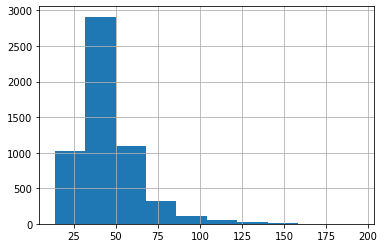

In [478]:
liftopia.net_rate_revenue.hist()

In [479]:
magic.net_rate_revenue.describe()

count    14113.000000
mean        53.436102
std         25.262679
min          1.860000
25%         39.050000
50%         50.210000
75%         59.510000
max        261.320000
Name: net_rate_revenue, dtype: float64

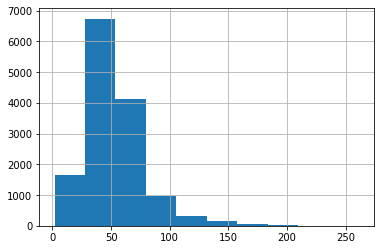

In [480]:
magic.net_rate_revenue.hist()

## Sales By Year

In [95]:
df.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2016-11-15 2017-02-16               No   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT           6413   
1  23 Jefferson Circle        Clinton              CT           6413   
2  23 Jefferson Circle        Clinton              CT           6413   
3  23 Jefferson Circle        Clinton              CT           6413   
4                  NaN       Guilford              VT           5301   

  purchaser_country  net_rate_revenue currency  order_to_trip_days  
0                US             50.21      USD                  50  
1                US             69.74      USD                  50  
2                US             50.21      USD                  50  
3                US             69.74      USD                  50  
4                US             19.54      USD                  93

In [97]:
# Trying to seperate by year
df['2017'] = df[df['trip_date'] == '2017']

ValueError: Wrong number of items passed 16, placement implies 1

In [98]:
years = [df_2017.shape, df_2018.shape, df_2019.shape, df_2020.shape]

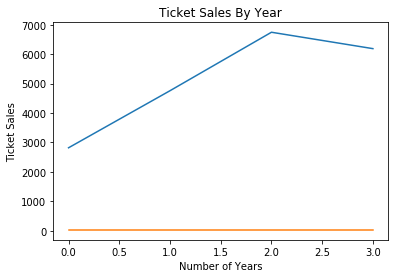

In [99]:
import matplotlib.pyplot as plt
plt.plot(years)
plt.xlabel('Number of Years')
plt.ylabel('Ticket Sales')
plt.title('Ticket Sales By Year')
plt.show()

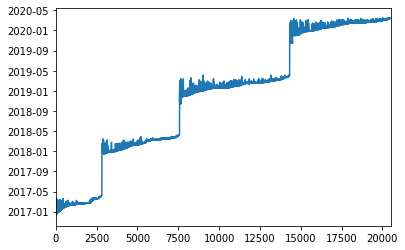

In [100]:
df.trip_date.plot()

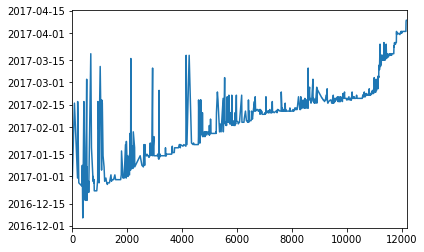

In [104]:
skiiers_2017_zipcodes.trip_date.plot()

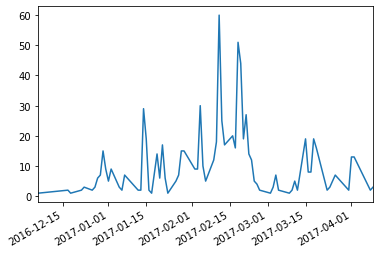

In [130]:
skiiers_2017_zipcodes.trip_date.value_counts().plot()

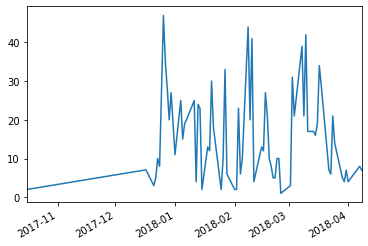

In [117]:
skiiers_2018_zipcodes.trip_date.value_counts().plot()

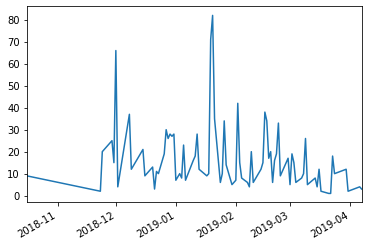

In [118]:
skiiers_2019_zipcodes.trip_date.value_counts().plot()

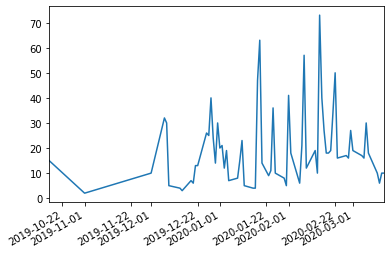

In [128]:
skiiers_2020_zipcodes.trip_date.value_counts().plot()

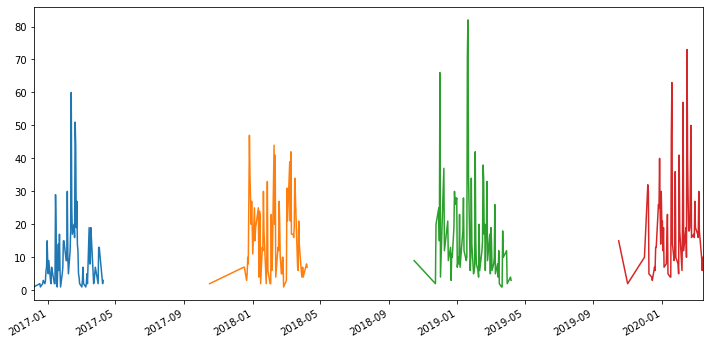

In [132]:
plt.figure(figsize=(12,6))
skiiers_2017_zipcodes.trip_date.value_counts().plot()
skiiers_2018_zipcodes.trip_date.value_counts().plot()
skiiers_2019_zipcodes.trip_date.value_counts().plot()
skiiers_2020_zipcodes.trip_date.value_counts().plot()

ValueError: not enough values to unpack (expected 3, got 2)

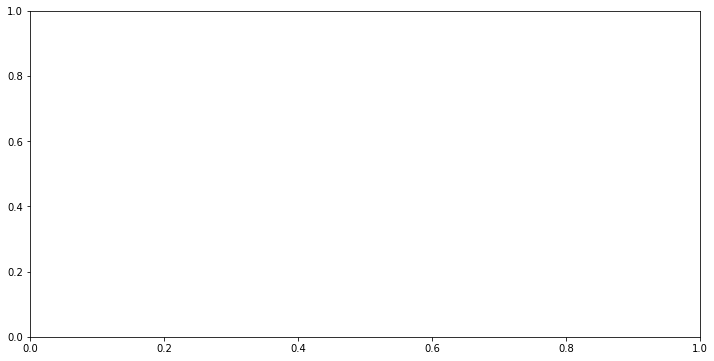

In [115]:
# Trying to get a graph of overlapping years...

#fig, ax1, ax2 = plt.subplots(1, 1, figsize = (12, 6))
#ax1 = skiiers_2017_zipcodes.trip_date.value_counts().plot()
#ax2 = skiiers_2018_zipcodes.trip_date.value_counts().plot()

#fig, ax1, ax2 = plt.subplots(1, 1, figsize = (12, 6))
#ax1.plot(skiiers_2017_zipcodes.trip_date.value_counts())
#ax2.plot(skiiers_2018_zipcodes.trip_date.value_counts())

In [101]:
df_by_year = df.copy()
df_by_year.set_index('trip_date', inplace=True)
df_by_year.head()

order_id order_status                              product  \
trip_date                                                                  
2016-12-31  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2016-12-31  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2016-12-31  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2016-12-31  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2017-02-16  10098733.0         PAID  Magic Mountain | 1 Day Lift Tickets   

               ticket_type           store order_date marketing_opt_in  \
trip_date                                                                
2016-12-31  Youth / Senior  Magic Mountain 2016-11-11              Yes   
2016-12-31           Adult  Magic Mountain 2016-11-11              Yes   
2016-12-31  Youth / Senior  Magic Mountain 2016-11-11              Yes   
2016-12-31           Adult  Magic Mountain 2016-11-11              Yes   
2017-02-16           Adult    Liftopia.com 2016-11-15               No   

              purchaser_address purchaser_city purchaser_state  purchaser_zip  \
trip_date                                                                       
2016-12-31  23 Jefferson Circle        Clinton              CT           6413   
2016-12-31  23 Jefferson Circle        Clinton              CT           6413   
2016-12-31  23 Jefferson Circle        Clinton              CT           6413   
2016-12-31  23 Jefferson Circle        Clinton              CT           6413   
2017-02-16                  NaN       Guilford              VT           5301   

           purchaser_country  net_rate_revenue currency  order_to_trip_days  
trip_date                                                                    
2016-12-31                US             50.21      USD                  50  
2016-12-31                US             69.74      USD                  50  
2016-12-31                US             50.21      USD                  50  
2016-12-31                US             69.74      USD                  50  
2017-02-16                US             19.54      USD                  93

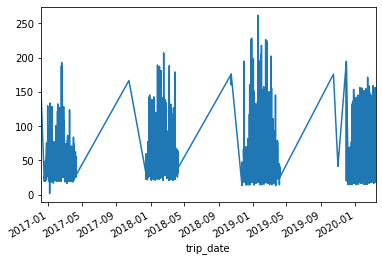

In [148]:
df_by_year.net_rate_revenue.plot()

In [150]:
# No idea what I'm doing?
df_rev_sum = df_by_year.groupby('trip_date').aggregate({'net_rate_revenue':'sum'})
df_rev_sum.head()

# I just want the net_rate_rev and trip_date
#df_by_rev = df_by_rev.filter(['trip_date','net_rate_revenue', axis=1)
#df_by_rev.head()

net_rate_revenue
trip_date                   
2016-12-06            304.30
2016-12-17             60.50
2016-12-18             46.73
2016-12-22            152.50
2016-12-23            126.89

In [151]:
df_rev_sum.describe()

net_rate_revenue
count        298.000000
mean        3380.568490
std         4178.778459
min           18.590000
25%          773.205000
50%         1974.250000
75%         4219.325000
max        28921.060000

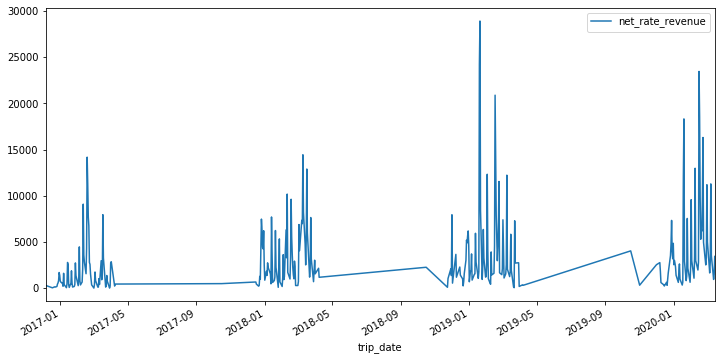

In [156]:
df_rev_sum.plot(figsize=(12,6))

In [153]:
df_rev_mean = df_by_year.groupby('trip_date').aggregate({'net_rate_revenue':'mean'})
df_rev_mean.head()

net_rate_revenue
trip_date                   
2016-12-06        152.150000
2016-12-17         30.250000
2016-12-18         23.365000
2016-12-22         25.416667
2016-12-23         25.378000

In [154]:
df_rev_mean.describe()

net_rate_revenue
count        298.000000
mean          47.248813
std           20.321516
min           14.974286
25%           36.269688
50%           46.196825
75%           53.334888
max          181.943571

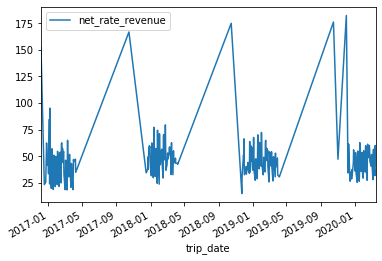

In [157]:
df_rev_mean.plot()

# Models

## Model 1 - Basic KMeans Cluster

In [486]:
df.head()

order_id order_status                              product  \
0  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
1  10097099.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
2  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
3  10097104.0    CANCELLED  Magic Mountain | 2 Day Lift Tickets   
4  10098733.0         PAID  Magic Mountain | 1 Day Lift Tickets   

      ticket_type           store order_date  trip_date marketing_opt_in  \
0  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
1           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
2  Youth / Senior  Magic Mountain 2016-11-11 2016-12-31              Yes   
3           Adult  Magic Mountain 2016-11-11 2016-12-31              Yes   
4           Adult    Liftopia.com 2016-11-15 2017-02-16               No   

     purchaser_address purchaser_city purchaser_state  purchaser_zip  \
0  23 Jefferson Circle        Clinton              CT           6413   
1  23 Jefferson Circle        Clinton              CT           6413   
2  23 Jefferson Circle        Clinton              CT           6413   
3  23 Jefferson Circle        Clinton              CT           6413   
4                  NaN       Guilford              VT           5301   

  purchaser_country  net_rate_revenue currency  order_to_trip_days  
0                US             50.21      USD                  50  
1                US             69.74      USD                  50  
2                US             50.21      USD                  50  
3                US             69.74      USD                  50  
4                US             19.54      USD                  93

In [488]:
df_magic = df[df.store == "Magic Mountain"]

In [489]:
df_magic.order_status.value_counts()

PAID         13799
CANCELLED      314
Name: order_status, dtype: int64

In [490]:
df_magic = df_magic[df_magic.order_status == "PAID"]

In [491]:
df_magic = df_magic.drop(["purchaser_country", "currency", "marketing_opt_in", "store", "order_status"], axis=1)

In [492]:
df_magic.isnull().sum()

order_id               0
product                0
ticket_type            0
order_date             0
trip_date              0
purchaser_address      2
purchaser_city         0
purchaser_state       60
purchaser_zip          0
net_rate_revenue       0
order_to_trip_days     0
dtype: int64

In [493]:
df_magic = df_magic.dropna()

In [494]:
df_magic.isnull().sum()

order_id              0
product               0
ticket_type           0
order_date            0
trip_date             0
purchaser_address     0
purchaser_city        0
purchaser_state       0
purchaser_zip         0
net_rate_revenue      0
order_to_trip_days    0
dtype: int64

In [495]:
df_magic.head()

order_id                              product ticket_type order_date  \
15  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
16  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
23  10110579.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
24  10110581.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
27  10115147.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-29   

    trip_date     purchaser_address  purchaser_city purchaser_state  \
15 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
16 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
23 2017-01-08       205 Chapin Road         Hampden              MA   
24 2017-02-12       205 Chapin Road         Hampden              MA   
27 2017-02-17      332 Jefferson Ct           Brick              NJ   

    purchaser_zip  net_rate_revenue  order_to_trip_days  
15           8742            118.10                  86  
16           8742            118.10                  86  
23           1036             36.26                  41  
24           1036             38.12                  76  
27           8724            120.89                  80

In [638]:
df_magic_numeric = df_magic.drop(["purchaser_address", "product", "ticket_type",
                                "order_date", 'purchaser_state', 'purchaser_city'],
                               axis=1)

In [639]:
df_magic_numeric.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0 2017-02-17           8742            118.10                  86
16  10105009.0 2017-02-17           8742            118.10                  86
23  10110579.0 2017-01-08           1036             36.26                  41
24  10110581.0 2017-02-12           1036             38.12                  76
27  10115147.0 2017-02-17           8724            120.89                  80

In [640]:
df_magic_numeric['trip_date'] = pd.to_datetime(df_magic_numeric['trip_date'])
df_magic_numeric['trip_date'] = df_magic_numeric['trip_date'].map(dt.datetime.toordinal)

In [641]:
df_magic_numeric.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0     736377           8742            118.10                  86
16  10105009.0     736377           8742            118.10                  86
23  10110579.0     736337           1036             36.26                  41
24  10110581.0     736372           1036             38.12                  76
27  10115147.0     736377           8724            120.89                  80

In [642]:
from sklearn.cluster import KMeans

In [643]:
kmeans_model_1 = KMeans(n_clusters=2)

In [644]:
kmeans_model_1.fit(df_magic_numeric)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [645]:
labels = kmeans_model_1.predict(df_magic_numeric)
centroids = kmeans_model_1.cluster_centers_

In [646]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [647]:
centroids

array([[1.36136617e+07, 7.37422369e+05, 8.86586234e+03, 5.26768892e+01,
        8.63538652e+00],
       [1.15636414e+07, 7.36825927e+05, 8.63143488e+03, 5.41645837e+01,
        5.78638049e+00]])

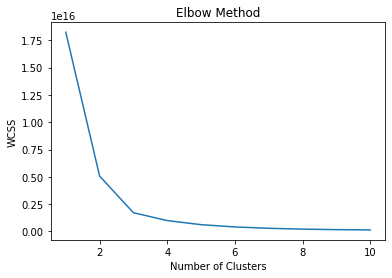

In [648]:
wcss = []
for i in range(1, 11):
    kmeans_model_1 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_model_1.fit(df_magic_numeric)
    wcss.append(kmeans_model_1.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Model 2 - KMeans Cluster (Two Variables)

In [650]:
df_magic.head()

order_id                              product ticket_type order_date  \
15  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
16  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
23  10110579.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
24  10110581.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
27  10115147.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-29   

    trip_date     purchaser_address  purchaser_city purchaser_state  \
15 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
16 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
23 2017-01-08       205 Chapin Road         Hampden              MA   
24 2017-02-12       205 Chapin Road         Hampden              MA   
27 2017-02-17      332 Jefferson Ct           Brick              NJ   

    purchaser_zip  net_rate_revenue  order_to_trip_days  
15           8742            118.10                  86  
16           8742            118.10                  86  
23           1036             36.26                  41  
24           1036             38.12                  76  
27           8724            120.89                  80

In [651]:
df_magic_2 = df_magic.drop(["purchaser_address", "product", "ticket_type",
                            "purchaser_state", "purchaser_city", "order_to_trip_days",
                            "order_id", "order_date", "net_rate_revenue"], axis=1)

In [652]:
df_magic_2['trip_date'] = pd.to_datetime(df_magic_2['trip_date'])
df_magic_2['trip_date'] = df_magic_2['trip_date'].map(dt.datetime.toordinal)

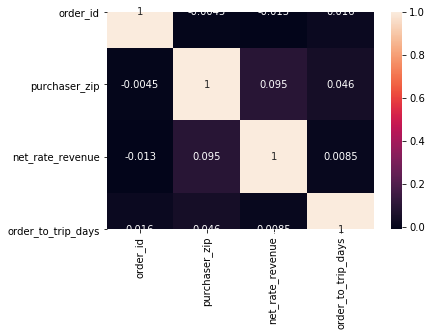

In [583]:
import seaborn as sns 

# generating correlation heatmap 
sns.heatmap(df_magic.corr(), annot = True) 
  
# posting correlation heatmap to output console  
plt.show() 

In [653]:
df_magic_2['purchaser_zip'].describe()

count    13737.000000
mean      8713.997307
std       9760.892173
min         47.000000
25%       3784.000000
50%       6518.000000
75%      10804.000000
max      97759.000000
Name: purchaser_zip, dtype: float64

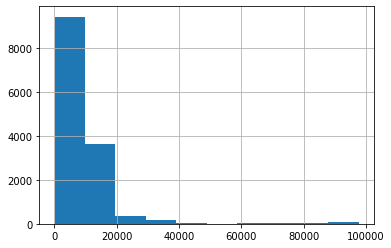

In [654]:
df_magic_2['purchaser_zip'].hist()

In [655]:
# Do I need to get rid of outliers?
df_magic_2['purchaser_zip'].mean()+3*df_magic_2['purchaser_zip'].std()

37996.67382694571

In [656]:
df_magic_2.head()

trip_date  purchaser_zip
15     736377           8742
16     736377           8742
23     736337           1036
24     736372           1036
27     736377           8724

In [658]:
# Source for code below
# https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

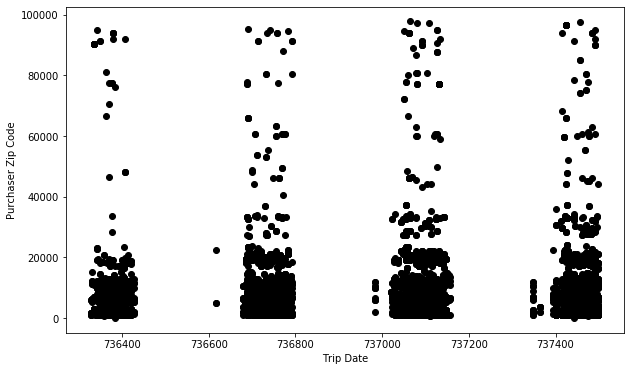

In [657]:
X = df_magic_2[["trip_date", "purchaser_zip"]]
#Visualise data points
plt.figure(figsize=(10,6))
plt.scatter(X["trip_date"], X["purchaser_zip"], c='black')
plt.xlabel('Trip Date')
plt.ylabel('Purchaser Zip Code')
plt.show()

In [659]:
# Number of clusters
K=3

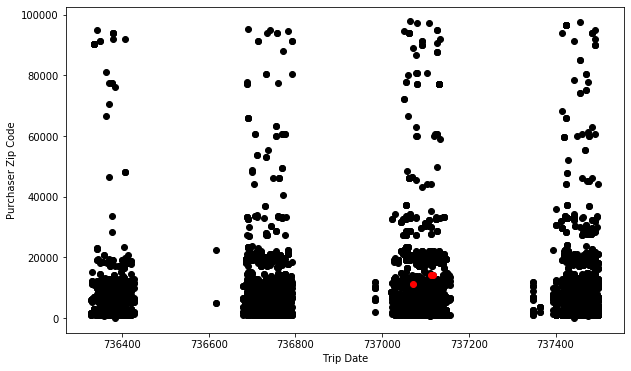

In [660]:
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(10,6))
plt.scatter(X["trip_date"], X["purchaser_zip"],c='black')
plt.scatter(Centroids["trip_date"],Centroids["purchaser_zip"],c='red')
plt.xlabel('Trip Date')
plt.ylabel('Purchaser Zip Code')
plt.show()

In [542]:
# Assign all the points to the closest cluster centroid
# Recompute centroids of newly formed clusters
# Repeat, reducing cluster standard dev

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["trip_date"]-row_d["trip_date"])**2
            d2=(row_c["purchaser_zip"]-row_d["purchaser_zip"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["trip_date","purchaser_zip"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = ((Centroids_new['trip_date'] - Centroids['trip_date']).sum() + 
        (Centroids_new['purchaser_zip'] - Centroids['purchaser_zip']).sum())
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["trip_date","purchaser_zip"]]

4448.603474266561
9186.650255395114
3508.7356561911856
9702.29645529239
12033.215274512666
7888.578982661307
14463.352780106714
5150.631532244674
1190.4490624061218
0.0


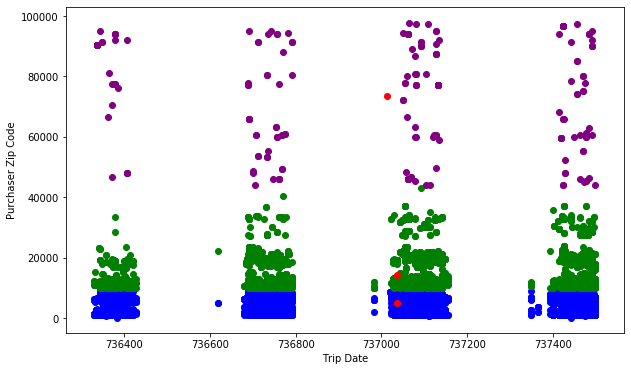

In [550]:
color=['blue','green','purple']
plt.figure(figsize=(10,6))
for k in range(K):
    df_magic_2=X[X["Cluster"]==k+1]
    plt.scatter(df_magic_2["trip_date"], df_magic_2["purchaser_zip"],c=color[k])
plt.scatter(Centroids["trip_date"],Centroids["purchaser_zip"],c='red')
plt.xlabel('Trip Date')
plt.ylabel('Purchaser Zip Code')
plt.show()

In [ ]:
# Looks like it is just categorizing by zip code - farther away = larger zip codes

In [ ]:
# Try again with more clusters

In [554]:
# Number of clusters
K=7

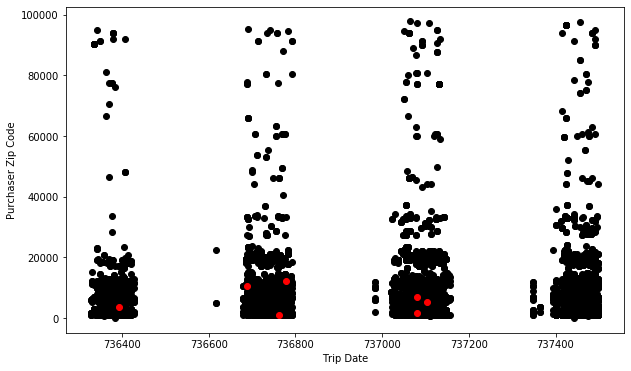

In [555]:
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(10,6))
plt.scatter(X["trip_date"], X["purchaser_zip"],c='black')
plt.scatter(Centroids["trip_date"],Centroids["purchaser_zip"],c='red')
plt.xlabel('Trip Date')
plt.ylabel('Purchaser Zip Code')
plt.show()

In [556]:
# Assign all the points to the closest cluster centroid
# Recompute centroids of newly formed clusters
# Repeat, reducing cluster standard dev

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["trip_date"]-row_d["trip_date"])**2
            d2=(row_c["purchaser_zip"]-row_d["purchaser_zip"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["trip_date","purchaser_zip"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = ((Centroids_new['trip_date'] - Centroids['trip_date']).sum() + 
        (Centroids_new['purchaser_zip'] - Centroids['purchaser_zip']).sum())
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["trip_date","purchaser_zip"]]

10863.373712619265
13711.951187229108
11158.527320291221
10029.641184923108
13718.565085671904
5646.721141135933
6586.864725171055
4837.2562561448085
1334.1325462732848
239.00583045295934
7.29089664091407
0.0


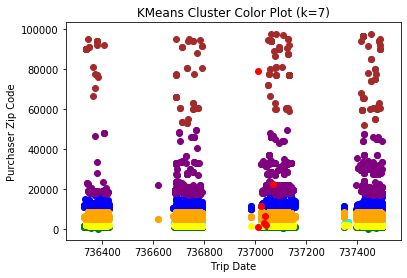

In [558]:
# With 7 Clusters
color=['blue','green','cyan','yellow','orange','purple','brown']
for k in range(K):
    df_magic_2=X[X["Cluster"]==k+1]
    plt.scatter(df_magic_2["trip_date"], df_magic_2["purchaser_zip"],c=color[k])
plt.scatter(Centroids["trip_date"],Centroids["purchaser_zip"],c='red')
plt.title('KMeans Cluster Color Plot (k=7)')
plt.xlabel('Trip Date')
plt.ylabel('Purchaser Zip Code')
plt.show()

In [ ]:
# Pretty much the same thing, by zip code of course

## Model 3 - Scale Data?

In [665]:
df_magic_numeric.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0     736377           8742            118.10                  86
16  10105009.0     736377           8742            118.10                  86
23  10110579.0     736337           1036             36.26                  41
24  10110581.0     736372           1036             38.12                  76
27  10115147.0     736377           8724            120.89                  80

In [666]:
df_magic_3 = df_magic_numeric

In [669]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_magic_3)

In [672]:
kmeans_model_3.fit(X_scaled)

NameError: name 'kmeans_model_3' is not defined

In [ ]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

## Model 4 - KMeans Cluster

In [673]:
df_magic.head()

order_id                              product ticket_type order_date  \
15  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
16  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
23  10110579.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
24  10110581.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
27  10115147.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-29   

    trip_date     purchaser_address  purchaser_city purchaser_state  \
15 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
16 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
23 2017-01-08       205 Chapin Road         Hampden              MA   
24 2017-02-12       205 Chapin Road         Hampden              MA   
27 2017-02-17      332 Jefferson Ct           Brick              NJ   

    purchaser_zip  net_rate_revenue  order_to_trip_days  
15           8742            118.10                  86  
16           8742            118.10                  86  
23           1036             36.26                  41  
24           1036             38.12                  76  
27           8724            120.89                  80

In [680]:
df_magic_4 = df_magic.drop(["purchaser_address", "product", "ticket_type",
                            "purchaser_state", "purchaser_city", "order_to_trip_days",
                            "order_id", "order_date", "purchaser_zip"], axis=1)

In [681]:
df_magic_4['trip_date'] = pd.to_datetime(df_magic_4['trip_date'])
df_magic_4['trip_date'] = df_magic_4['trip_date'].map(dt.datetime.toordinal)

In [682]:
df_magic_4.head()

trip_date  net_rate_revenue
15     736377            118.10
16     736377            118.10
23     736337             36.26
24     736372             38.12
27     736377            120.89

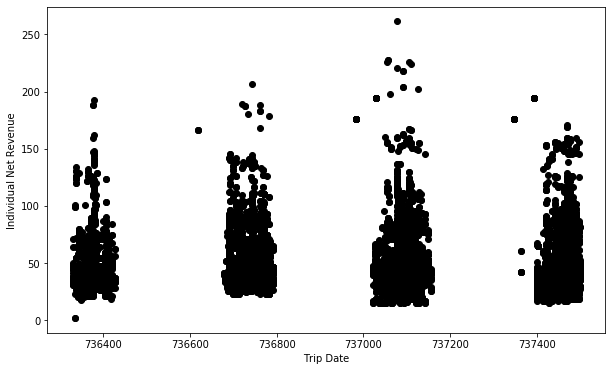

In [683]:
X = df_magic_4[["trip_date", "net_rate_revenue"]]
#Visualise data points
plt.figure(figsize=(10,6))
plt.scatter(X["trip_date"], X["net_rate_revenue"], c='black')
plt.xlabel('Trip Date')
plt.ylabel('Individual Net Revenue')
plt.show()

In [684]:
# Number of clusters
K=9

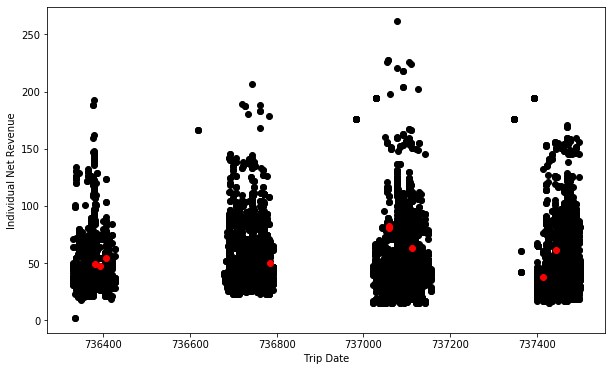

In [685]:
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(10,6))
plt.scatter(X["trip_date"], X["net_rate_revenue"],c='black')
plt.scatter(Centroids["trip_date"],Centroids["net_rate_revenue"],c='red')
plt.xlabel('Trip Date')
plt.ylabel('Individual Net Revenue')
plt.show()

In [686]:
# Assign all the points to the closest cluster centroid
# Recompute centroids of newly formed clusters
# Repeat, reducing cluster standard dev

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["trip_date"]-row_d["trip_date"])**2
            d2=(row_c["net_rate_revenue"]-row_d["net_rate_revenue"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["trip_date","net_rate_revenue"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = ((Centroids_new['trip_date'] - Centroids['trip_date']).sum() + 
        (Centroids_new['net_rate_revenue'] - Centroids['net_rate_revenue']).sum())
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["trip_date","net_rate_revenue"]]

40.97260362185464
8.938808596519507
5.240623023817804
7.300726848819629
6.872385530751231
9.128936386164547
8.238932883031453
3.0291405071047066
1.1995005261006426
0.13188809041849936
0.0


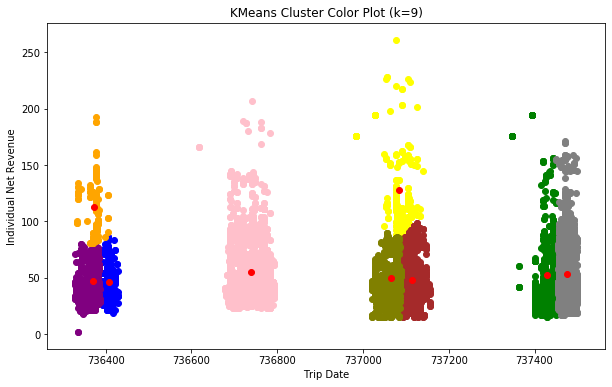

In [687]:
# With 9 Clusters
color=['blue','green','purple','yellow','orange','brown','pink','gray','olive']
plt.figure(figsize=(10,6))
for k in range(K):
    df_magic_4=X[X["Cluster"]==k+1]
    plt.scatter(df_magic_4["trip_date"], df_magic_4["net_rate_revenue"],c=color[k])
plt.scatter(Centroids["trip_date"],Centroids["net_rate_revenue"],c='red')
plt.title('KMeans Cluster Color Plot (k=9)')
plt.xlabel('Trip Date')
plt.ylabel('Individual Net Revenue')
plt.show()

In [688]:
df_magic_4.head()

trip_date  net_rate_revenue           1           2           3  \
7587     737085             23.25  677.588657  345.682894  716.047232   
7596     737054             48.36  646.204785  375.502736  684.660967   
7597     737054             48.36  646.204785  375.502736  684.660967   
7620     737057             33.48  649.324982  372.945313  687.788595   
7621     737057             33.48  649.324982  372.945313  687.788595   

               4           5          6           7           8          9  \
7587  104.312562  717.503647  38.633598  346.876148  391.404496  32.824709   
7596   84.544176  683.942605  60.554465  314.486184  421.259515  11.167976   
7597   84.544176  683.942605  60.554465  314.486184  421.259515  11.167976   
7620   97.761550  688.480054  59.389798  318.147345  418.710123  17.846741   
7621   97.761550  688.480054  59.389798  318.147345  418.710123  17.846741   

      Cluster  
7587        9  
7596        9  
7597        9  
7620        9  
7621        9

In [691]:
df_magic_4[df_magic_4.Cluster == 9].head()

trip_date  net_rate_revenue           1           2           3  \
7587     737085             23.25  677.588657  345.682894  716.047232   
7596     737054             48.36  646.204785  375.502736  684.660967   
7597     737054             48.36  646.204785  375.502736  684.660967   
7620     737057             33.48  649.324982  372.945313  687.788595   
7621     737057             33.48  649.324982  372.945313  687.788595   

               4           5          6           7           8          9  \
7587  104.312562  717.503647  38.633598  346.876148  391.404496  32.824709   
7596   84.544176  683.942605  60.554465  314.486184  421.259515  11.167976   
7597   84.544176  683.942605  60.554465  314.486184  421.259515  11.167976   
7620   97.761550  688.480054  59.389798  318.147345  418.710123  17.846741   
7621   97.761550  688.480054  59.389798  318.147345  418.710123  17.846741   

      Cluster  
7587        9  
7596        9  
7597        9  
7620        9  
7621        9

In [ ]:
# Not sure is this is any different? Too many clusters?
# Clustering by year again, mostly... 

## What's this Model?

In [ ]:
# This looks like fun code - not sure what it does

In [586]:
class Kmeans(object):

    def __init__(self, k=1):
        self.k = k

    def train(self, data, verbose=1):

        shape = data.shape

        ranges = np.zeros((shape[1], 2))
        centroids = np.zeros((shape[1], 2))

        for dim in range(shape[1]):
            ranges[dim, 0] = np.min(data[:,dim])
            ranges[dim, 1] = np.max(data[:,dim])

        if verbose == 1:
            print('Ranges: ')
            print(ranges)

        centroids = np.zeros((self.k, shape[1]))
        for i in range(self.k):
            for dim in range(shape[1]):
                centroids[i, dim] = np.random.uniform(ranges[dim, 0], ranges[dim, 1], 1)

        if verbose == 1:
            print('Centroids: ')
            print(centroids)

            plt.scatter(data[:,0], data[:,1])
            plt.scatter(centroids[:,0], centroids[:,1], c = 'r')
            plt.show()

        count = 0
        while count < 100:
            count += 1
            if verbose == 1:
                print('-----------------------------------------------')
                print('Iteration: ', count)

            distances = np.zeros((shape[0],self.k))
            for ix, i in enumerate(data):
                for ic, c in enumerate(centroids):
                    distances[ix, ic] = np.sqrt(np.sum((i-c)**2))

            labels = np.argmin(distances, axis = 1)

            new_centroids = np.zeros((self.k, shape[1]))
            for centroid in range(self.k):
                temp = data[labels == centroid]
                if len(temp) == 0:
                    return 0
                for dim in range(shape[1]): 
                    new_centroids[centroid, dim] = np.mean(temp[:,dim])

            if verbose == 1:
                plt.scatter(data[:,0], data[:,1], c = labels)
                plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'r')
                plt.show()

            if np.linalg.norm(new_centroids - centroids) < np.finfo(float).eps:
                print("DONE!")
                break

            centroids = new_centroids
        self.centroids = centroids
        self.labels = labels
        if verbose == 1:
            print(labels)
            print(centroids)
        return 1

    def getAverageDistance(self, data):

        dists = np.zeros((len(self.centroids),))
        for ix, centroid in enumerate(self.centroids):
            temp = data[self.labels == ix]
            dist = 0
            for i in temp:
                dist += np.linalg.norm(i - centroid)
            dists[ix] = dist/len(temp)
        return dists

    def getLabels(self):
        return self.labels

In [588]:
model_something = Kmeans(df_magic_numeric)

In [593]:
model_something

## Model 5 - All numerical columns

In [692]:
df_magic_numeric.columns

Index(['order_id', 'trip_date', 'purchaser_zip', 'net_rate_revenue',
       'order_to_trip_days'],
      dtype='object')

In [693]:
df_magic_5 = df_magic_numeric.copy()

In [694]:
kmeans_model_5 = KMeans(n_clusters=7)

y = kmeans_model_5.fit_predict(df_magic_5[['order_id', 'trip_date',
                                               'purchaser_zip', 'net_rate_revenue', 
                                               'order_to_trip_days']])

df_magic_5['Cluster'] = y

df_magic_5.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  \
15  10105009.0     736377           8742            118.10   
16  10105009.0     736377           8742            118.10   
23  10110579.0     736337           1036             36.26   
24  10110581.0     736372           1036             38.12   
27  10115147.0     736377           8724            120.89   

    order_to_trip_days  Cluster  
15                  86        2  
16                  86        2  
23                  41        2  
24                  76        2  
27                  80        2

In [695]:
df_magic_5.Cluster.describe()

count    13737.000000
mean         3.121133
std          1.947633
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: Cluster, dtype: float64

In [697]:
df_magic_5[df_magic_5.Cluster == 2].head()

order_id  trip_date  purchaser_zip  net_rate_revenue  \
15  10105009.0     736377           8742            118.10   
16  10105009.0     736377           8742            118.10   
23  10110579.0     736337           1036             36.26   
24  10110581.0     736372           1036             38.12   
27  10115147.0     736377           8724            120.89   

    order_to_trip_days  Cluster  
15                  86        2  
16                  86        2  
23                  41        2  
24                  76        2  
27                  80        2

In [698]:
# What is this inertia thing?  And that is a HUGE number!
kmeans_model_5.inertia_

291005170492998.7

In [699]:
kmeans_model_5.cluster_centers_ 

array([[1.33956400e+07, 7.37436210e+05, 9.72556799e+03, 5.07788443e+01,
        1.03028430e+01],
       [1.15677053e+07, 7.36821184e+05, 8.21172239e+03, 5.38298176e+01,
        5.89595661e+00],
       [1.05316728e+07, 7.36379066e+05, 8.32805882e+03, 5.14899690e+01,
        4.12817337e+00],
       [1.21193777e+07, 7.37077603e+05, 9.45529590e+03, 5.63629543e+01,
        6.45246971e+00],
       [1.40005593e+07, 7.37476002e+05, 8.18819905e+03, 5.34650753e+01,
        4.06066614e+00],
       [1.11364909e+07, 7.36715305e+05, 9.18813076e+03, 5.61129335e+01,
        7.90960773e+00],
       [1.25519541e+07, 7.37140446e+05, 8.18028258e+03, 5.26508590e+01,
        9.74914592e+00]])

In [700]:
kmeans_model_5.labels_

array([2, 2, 2, ..., 4, 4, 4], dtype=int32)

In [ ]:
# At least I now have most of the data I want...

## Model 6 - Without year

In [701]:
df_magic_6 = df_magic_numeric.drop("trip_date", axis=1)

In [702]:
df_magic_6.head()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0           8742            118.10                  86
16  10105009.0           8742            118.10                  86
23  10110579.0           1036             36.26                  41
24  10110581.0           1036             38.12                  76
27  10115147.0           8724            120.89                  80

In [703]:
df_magic_6.columns

Index(['order_id', 'purchaser_zip', 'net_rate_revenue', 'order_to_trip_days'], dtype='object')

In [704]:
kmeans_model_6 = KMeans(n_clusters=7)

y = kmeans_model_6.fit_predict(df_magic_6[['order_id', 'purchaser_zip', 'net_rate_revenue', 'order_to_trip_days']])

df_magic_6['Cluster'] = y

df_magic_6.head()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days  Cluster
15  10105009.0           8742            118.10                  86        3
16  10105009.0           8742            118.10                  86        3
23  10110579.0           1036             36.26                  41        3
24  10110581.0           1036             38.12                  76        3
27  10115147.0           8724            120.89                  80        3

In [705]:
df_magic_6[df_magic_6.Cluster == 3].head()

order_id  purchaser_zip  net_rate_revenue  order_to_trip_days  Cluster
15  10105009.0           8742            118.10                  86        3
16  10105009.0           8742            118.10                  86        3
23  10110579.0           1036             36.26                  41        3
24  10110581.0           1036             38.12                  76        3
27  10115147.0           8724            120.89                  80        3

In [ ]:
# Again, it's just grouping by year.

## Model 7 - Everything Scaled

In [737]:
df_magic_7 = df_magic_numeric.copy()

In [738]:
df_magic_7.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0     736377           8742            118.10                  86
16  10105009.0     736377           8742            118.10                  86
23  10110579.0     736337           1036             36.26                  41
24  10110581.0     736372           1036             38.12                  76
27  10115147.0     736377           8724            120.89                  80

In [739]:
scaler = MinMaxScaler()
model_7_scaled = scaler.fit_transform(df_magic_7)

In [740]:
model_7_scaled[0]

array([0.        , 0.04102564, 0.088986  , 0.4480074 , 0.37885463])

In [741]:
# Not sure what to do with this scaled array!

In [742]:
kmeans_model_7 = KMeans(n_clusters=3)
y_kmeans_7 = kmeans_model_7.fit_predict(model_7_scaled)
y_kmeans_7

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Not sure if this worked either

In [743]:
kmeans_model_7 = KMeans(n_clusters=7)

y = kmeans_model_7.fit_predict(model_7_scaled)

df_magic_7['Cluster'] = y

df_magic_7.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  \
15  10105009.0     736377           8742            118.10   
16  10105009.0     736377           8742            118.10   
23  10110579.0     736337           1036             36.26   
24  10110581.0     736372           1036             38.12   
27  10115147.0     736377           8724            120.89   

    order_to_trip_days  Cluster  
15                  86        3  
16                  86        3  
23                  41        3  
24                  76        3  
27                  80        3

## Model 8 - Elbow Method for Clustering

In [713]:
df_magic_8 = df_magic_numeric.copy()
df_magic_8.head()

order_id  trip_date  purchaser_zip  net_rate_revenue  order_to_trip_days
15  10105009.0     736377           8742            118.10                  86
16  10105009.0     736377           8742            118.10                  86
23  10110579.0     736337           1036             36.26                  41
24  10110581.0     736372           1036             38.12                  76
27  10115147.0     736377           8724            120.89                  80

In [714]:
x = df_magic_8.iloc[:, [0,1,2,3,4]].values

In [717]:
x[0]

array([1.0105009e+07, 7.3637700e+05, 8.7420000e+03, 1.1810000e+02,
       8.6000000e+01])

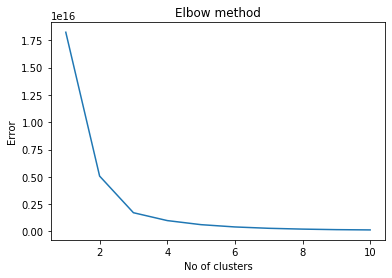

In [727]:
# Elbow Method
Error =[]
for i in range(1, 11):
    kmeans_model_8 = KMeans(n_clusters = i).fit(x)
    kmeans_model_8.fit(x)
    Error.append(kmeans_model_8.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [729]:
kmeans_model_8 = KMeans(n_clusters=3)
y_kmeans_8 = kmeans_model_8.fit_predict(x)
y_kmeans_8

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [730]:
kmeans_model_8.cluster_centers_

array([[1.10626121e+07, 7.36623117e+05, 8.50768415e+03, 5.38362630e+01,
        4.86909528e+00],
       [1.37699006e+07, 7.37460475e+05, 8.79053419e+03, 5.23953930e+01,
        5.99367243e+00],
       [1.22880847e+07, 7.37104742e+05, 8.86862824e+03, 5.45342789e+01,
        9.56757340e+00]])

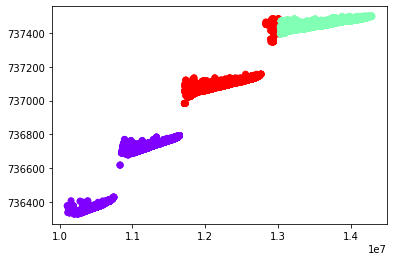

In [731]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans_8, cmap='rainbow')

In [ ]:
# What next?????
# K_Means_Cluster() algorithm to segment/describe customers
# Predict repeat customers for Magic (based on address, repeat or not, 1 or 0)
    # Loop through 
    
    # groupby address, unique by date

# Models Again

## Grouped by Address

I would group each order by address and make features like number of tickets purchases, number of adult tickets purchased, number of child tickets purchased, etc

In [766]:
df_magic.head()

order_id                              product ticket_type order_date  \
15  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
16  10105009.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-23   
23  10110579.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
24  10110581.0  Magic Mountain | 1 Day Lift Tickets       Adult 2016-11-28   
27  10115147.0  Magic Mountain | 3 Day Lift Tickets       Adult 2016-11-29   

    trip_date     purchaser_address  purchaser_city purchaser_state  \
15 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
16 2017-02-17  1128 Lawrence Avenue  Point Pleasant              NJ   
23 2017-01-08       205 Chapin Road         Hampden              MA   
24 2017-02-12       205 Chapin Road         Hampden              MA   
27 2017-02-17      332 Jefferson Ct           Brick              NJ   

    purchaser_zip  net_rate_revenue  order_to_trip_days  
15           8742            118.10                  86  
16           8742            118.10                  86  
23           1036             36.26                  41  
24           1036             38.12                  76  
27           8724            120.89                  80

In [752]:
df.purchaser_address.value_counts()

733 PROSPECT ST            33
8 Kane Road                28
136 Rhodes Road            25
456 Jones Hollow Road      23
209 old kings hwy North    22
                           ..
425 Longwood Drive          1
1220 Audubon drive          1
3215 Bigelow Commons        1
65 Walthery Avenue          1
2 Grenfell Drive            1
Name: purchaser_address, Length: 5802, dtype: int64

In [813]:
df.order_id.value_counts(bins=3)

(11493560.0, 12890021.0]      7651
(10092909.616, 11493560.0]    6061
(12890021.0, 14286482.0]      5960
Name: order_id, dtype: int64

## Groupby Again

In [878]:
repeat_customers = df.groupby('purchaser_address')['trip_date'].nunique()
repeat_customers = pd.DataFrame(repeat_customers)

In [879]:
repeat_customers.head()

trip_date
purchaser_address                     
!4 Cedar Terrace                     2
#433, 700 Bloomfield Avenue          1
08 woodmont rd                       1
1 Abington Road                      1
1 Andrew Circle                      1

In [880]:
repeat_customers.describe()

trip_date
count  5802.000000
mean      1.244571
std       0.738989
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      13.000000

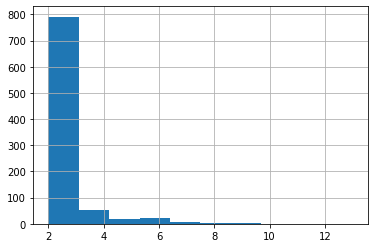

In [966]:
repeat_customers.trip_date.hist()

In [881]:
repeat_customers = repeat_customers[repeat_customers.trip_date > 1]

In [882]:
repeat_customers.head()

trip_date
purchaser_address             
!4 Cedar Terrace             2
1 Astor Place                2
1 E. Welling Avenue          2
1 Edgehill Terrace           2
1 Fore River Ave             2

In [883]:
repeat_customers.describe()

trip_date
count  902.000000
mean     2.573171
std      1.193150
min      2.000000
25%      2.000000
50%      2.000000
75%      3.000000
max     13.000000

In [884]:
adult_tics = df[df['ticket_type'] =='Adult'].groupby('purchaser_address')['ticket_type'].count()
adult_tics = pd.DataFrame(adult_tics)
adult_tics.head()

ticket_type
purchaser_address                       
!4 Cedar Terrace                       4
#433, 700 Bloomfield Avenue            1
1 Abington Road                        1
1 Andrew Circle                        4
1 Astor Place                          3

In [885]:
repeat_customers['adult'] = adult_tics['ticket_type']
repeat_customers.head()

trip_date  adult
purchaser_address                    
!4 Cedar Terrace             2    4.0
1 Astor Place                2    3.0
1 E. Welling Avenue          2    4.0
1 Edgehill Terrace           2    4.0
1 Fore River Ave             2    NaN

In [886]:
youth_tics = df[df['ticket_type'] =='Youth / Senior'].groupby('purchaser_address')['ticket_type'].count()
youth_tics = pd.DataFrame(youth_tics)
youth_tics.head()

ticket_type
purchaser_address               
08 woodmont rd                 1
1 Cowesit Ave.                 2
1 E. Welling Avenue            4
1 Fore River Ave               2
1 Forge Ln                     4

In [887]:
repeat_customers['kid/senior'] = youth_tics['ticket_type']
repeat_customers.head()

trip_date  adult  kid/senior
purchaser_address                                
!4 Cedar Terrace             2    4.0         NaN
1 Astor Place                2    3.0         NaN
1 E. Welling Avenue          2    4.0         4.0
1 Edgehill Terrace           2    4.0         NaN
1 Fore River Ave             2    NaN         2.0

In [891]:
repeat_customers.sort_values("trip_date", ascending=False,)

trip_date  adult  kid/senior
purchaser_address                                 
440 Kent Avenue, 14C         13   11.0         8.0
2071 Main Street             11   21.0         NaN
218 Hartford st               9   10.0         NaN
733 PROSPECT ST               9   25.0         8.0
136 Rhodes Road               9   14.0        11.0
...                         ...    ...         ...
25 KIEFERLE ROAD              2    2.0         NaN
25 Swartson ct                2    2.0         NaN
25 chelton ave                2    6.0         NaN
25 old school street          2    2.0         NaN
3123 Lovers Lane              2    3.0         NaN

[902 rows x 3 columns]

In [902]:
repeat_customers.fillna(0)

trip_date  adult  kid/senior
purchaser_address                                
!4 Cedar Terrace             2    4.0         0.0
1 Astor Place                2    3.0         0.0
1 E. Welling Avenue          2    4.0         4.0
1 Edgehill Terrace           2    4.0         0.0
1 Fore River Ave             2    0.0         2.0
...                        ...    ...         ...
po box 265                   2    2.0         0.0
po box 268                   2    0.0         2.0
po box 431                   2    3.0         1.0
po box 474                   2    3.0         3.0
po box 551                   3    3.0         0.0

[902 rows x 3 columns]

In [903]:
repeat_customers.describe()

trip_date       adult  kid/senior
count  902.000000  846.000000  414.000000
mean     2.573171    3.495272    3.473430
std      1.193150    2.222393    2.553641
min      2.000000    1.000000    1.000000
25%      2.000000    2.000000    2.000000
50%      2.000000    3.000000    3.000000
75%      3.000000    4.000000    4.000000
max     13.000000   25.000000   16.000000

In [941]:
repeat_customers.adult.sum() + repeat_customers['kid/senior'].sum()

4395.0

In [862]:
repeat_customers = repeat_customers.dropna()
repeat_customers.head()

trip_date  adult
purchaser_address                    
!4 Cedar Terrace             2    4.0
1 Astor Place                2    3.0
1 E. Welling Avenue          2    4.0
1 Edgehill Terrace           2    4.0
1 Forge Ln                   2    7.0

In [863]:
repeat_customers.describe()

trip_date       adult
count  846.000000  846.000000
mean     2.581560    3.495272
std      1.206429    2.222393
min      2.000000    1.000000
25%      2.000000    2.000000
50%      2.000000    3.000000
75%      3.000000    4.000000
max     13.000000   25.000000

In [888]:
df[df.purchaser_address == '1 E. Welling Avenue']

order_id order_status                              product  \
3229   10996232.0         PAID  Magic Mountain | 1 Day Lift Tickets   
3230   10996232.0         PAID  Magic Mountain | 1 Day Lift Tickets   
3231   10996232.0         PAID  Magic Mountain | 1 Day Lift Tickets   
3232   10996232.0         PAID  Magic Mountain | 1 Day Lift Tickets   
16613  13589698.0         PAID  Magic Mountain | 1 Day Lift Tickets   
16614  13589698.0         PAID  Magic Mountain | 1 Day Lift Tickets   
16615  13589698.0         PAID  Magic Mountain | 1 Day Lift Tickets   
16616  13589698.0         PAID  Magic Mountain | 1 Day Lift Tickets   

          ticket_type           store order_date  trip_date marketing_opt_in  \
3229            Adult  Magic Mountain 2017-12-25 2017-12-26              Yes   
3230            Adult  Magic Mountain 2017-12-25 2017-12-26              Yes   
3231   Youth / Senior  Magic Mountain 2017-12-25 2017-12-26              Yes   
3232   Youth / Senior  Magic Mountain 2017-12-25 2017-12-26              Yes   
16613           Adult  Magic Mountain 2020-01-17 2020-01-18              Yes   
16614           Adult  Magic Mountain 2020-01-17 2020-01-18              Yes   
16615  Youth / Senior  Magic Mountain 2020-01-17 2020-01-18              Yes   
16616  Youth / Senior  Magic Mountain 2020-01-17 2020-01-18              Yes   

         purchaser_address purchaser_city purchaser_state  purchaser_zip  \
3229   1 E. Welling Avenue     Pennington              NJ           8534   
3230   1 E. Welling Avenue     Pennington              NJ           8534   
3231   1 E. Welling Avenue     Pennington              NJ           8534   
3232   1 E. Welling Avenue     Pennington              NJ           8534   
16613  1 E. Welling Avenue     Pennington              NJ           8534   
16614  1 E. Welling Avenue     Pennington              NJ           8534   
16615  1 E. Welling Avenue     Pennington              NJ           8534   
16616  1 E. Welling Avenue     Pennington              NJ           8534   

      purchaser_country  net_rate_revenue currency  order_to_trip_days  
3229                 US             53.93      USD                   1  
3230                 US             55.79      USD                   1  
3231                 US             39.98      USD                   1  
3232                 US             39.98      USD                   1  
16613                US             57.65      USD                   1  
16614                US             57.65      USD                   1  
16615                US             40.91      USD                   1  
16616                US             40.91      USD                   1

In [822]:
return_customers = df.groupby('purchaser_address')['trip_date', 'product', 'store', 'ticket_type']

In [825]:
return_customers.first()

trip_date  \
purchaser_address                        
!4 Cedar Terrace            2018-01-20   
#433, 700 Bloomfield Avenue 2019-02-16   
08 woodmont rd              2019-02-16   
1 Abington Road             2018-12-09   
1 Andrew Circle             2018-03-04   
...                                ...   
po box 551                  2018-04-07   
po box 596                  2019-01-19   
po box 605                  2017-03-15   
po box 75                   2020-02-22   
po. box 507                 2019-01-26   

                                                                 product  \
purchaser_address                                                          
!4 Cedar Terrace                     Magic Mountain | 1 Day Lift Tickets   
#433, 700 Bloomfield Avenue          Magic Mountain | 1 Day Lift Tickets   
08 woodmont rd                       Magic Mountain | 2 Day Lift Tickets   
1 Abington Road                      Magic Mountain | 1 Day Lift Tickets   
1 Andrew Circle                      Magic Mountain | 1 Day Lift Tickets   
...                                                                  ...   
po box 551                           Magic Mountain | 1 Day Lift Tickets   
po box 596                           Magic Mountain | 1 Day Lift Tickets   
po box 605                           Magic Mountain | 1 Day Lift Tickets   
po box 75                            Magic Mountain | 1 Day Lift Tickets   
po. box 507                  Magic Mountain | 1 Day Lift Ticket + Rental   

                                      store     ticket_type  
purchaser_address                                            
!4 Cedar Terrace             Magic Mountain           Adult  
#433, 700 Bloomfield Avenue  Magic Mountain           Adult  
08 woodmont rd               Magic Mountain  Youth / Senior  
1 Abington Road              Magic Mountain           Adult  
1 Andrew Circle              Magic Mountain           Adult  
...                                     ...             ...  
po box 551                   Magic Mountain           Adult  
po box 596                   Magic Mountain           Adult  
po box 605                   Magic Mountain           Adult  
po box 75                    Magic Mountain           Adult  
po. box 507                  Magic Mountain           Adult  

[5802 rows x 4 columns]

In [954]:
customers_by_address = df.groupby(['purchaser_address'])['net_rate_revenue','store', 'ticket_type', 'trip_date']

In [955]:
customers_by_address.first()

net_rate_revenue           store     ticket_type  \
purchaser_address                                                               
!4 Cedar Terrace                        57.65  Magic Mountain           Adult   
#433, 700 Bloomfield Avenue             60.44  Magic Mountain           Adult   
08 woodmont rd                          82.76  Magic Mountain  Youth / Senior   
1 Abington Road                         41.84  Magic Mountain           Adult   
1 Andrew Circle                         51.14  Magic Mountain           Adult   
...                                       ...             ...             ...   
po box 551                              35.33  Magic Mountain           Adult   
po box 596                              59.51  Magic Mountain           Adult   
po box 605                              55.79  Magic Mountain           Adult   
po box 75                               62.30  Magic Mountain           Adult   
po. box 507                             79.04  Magic Mountain           Adult   

                             trip_date  
purchaser_address                       
!4 Cedar Terrace            2018-01-20  
#433, 700 Bloomfield Avenue 2019-02-16  
08 woodmont rd              2019-02-16  
1 Abington Road             2018-12-09  
1 Andrew Circle             2018-03-04  
...                                ...  
po box 551                  2018-04-07  
po box 596                  2019-01-19  
po box 605                  2017-03-15  
po box 75                   2020-02-22  
po. box 507                 2019-01-26  

[5802 rows x 4 columns]

In [948]:
customers_by_address.head()

net_rate_revenue           store     ticket_type
0                 50.21  Magic Mountain  Youth / Senior
1                 69.74  Magic Mountain           Adult
2                 50.21  Magic Mountain  Youth / Senior
3                 69.74  Magic Mountain           Adult
4                 19.54    Liftopia.com           Adult
...                 ...             ...             ...
20500             41.84  Magic Mountain  Youth / Senior
20501             41.84  Magic Mountain  Youth / Senior
20504             51.14  Magic Mountain           Adult
20508             51.14  Magic Mountain           Adult
20509             51.14  Magic Mountain           Adult

[12822 rows x 3 columns]

In [958]:
customers_with_ticket = df.groupby('purchaser_address')['ticket_type'].apply(lambda group_series: group_series.tolist())

In [961]:
customers_with_ticket.head()

purchaser_address
!4 Cedar Terrace               [Adult, Adult, Adult, Adult]
#433, 700 Bloomfield Avenue                         [Adult]
08 woodmont rd                             [Youth / Senior]
1 Abington Road                                     [Adult]
1 Andrew Circle                [Adult, Adult, Adult, Adult]
Name: ticket_type, dtype: object

In [962]:
customer_dates = df.groupby('purchaser_address')['trip_date'].apply(lambda group_series: group_series.tolist())

In [964]:
customer_dates.head()

purchaser_address
!4 Cedar Terrace               [2018-01-20 00:00:00, 2018-01-20 00:00:00, 201...
#433, 700 Bloomfield Avenue                                [2019-02-16 00:00:00]
08 woodmont rd                                             [2019-02-16 00:00:00]
1 Abington Road                                            [2018-12-09 00:00:00]
1 Andrew Circle                [2018-03-04 00:00:00, 2018-03-04 00:00:00, 201...
Name: trip_date, dtype: object

In [780]:
customers_by_zip = df.groupby(['purchaser_zip','trip_date','ticket_type'])

In [765]:
customers_by_zip.first()

order_id order_status  \
purchaser_zip trip_date  ticket_type                               
0             2019-03-09 Adult           12630004.0         PAID   
47            2017-02-24 Youth / Senior  10592117.0         PAID   
              2020-01-18 Youth / Senior  13576974.0         PAID   
661           2017-01-29 Adult           10437576.0         PAID   
850           2019-02-20 Adult           12473498.0         PAID   
...                                             ...          ...   
97405         2019-01-21 Youth / Senior  12202557.0         PAID   
97520         2020-02-01 Adult           13768334.0         PAID   
97759         2019-01-05 Adult           12036791.0         PAID   
98122         2020-02-16 Adult           13962756.0         PAID   
98629         2018-01-01 Adult           10996105.0         PAID   

                                                                             product  \
purchaser_zip trip_date  ticket_type                                                   
0             2019-03-09 Adult                   Magic Mountain | 1 Day Lift Tickets   
47            2017-02-24 Youth / Senior          Magic Mountain | 2 Day Lift Tickets   
              2020-01-18 Youth / Senior          Magic Mountain | 2 Day Lift Tickets   
661           2017-01-29 Adult                   Magic Mountain | 1 Day Lift Tickets   
850           2019-02-20 Adult                   Magic Mountain | 1 Day Lift Tickets   
...                                                                              ...   
97405         2019-01-21 Youth / Senior          Magic Mountain | 1 Day Lift Tickets   
97520         2020-02-01 Adult                   Magic Mountain | 1 Day Lift Tickets   
97759         2019-01-05 Adult           Magic Mountain | 1 Day Lift Ticket + Rental   
98122         2020-02-16 Adult                   Magic Mountain | 1 Day Lift Tickets   
98629         2018-01-01 Adult                   Magic Mountain | 1 Day Lift Tickets   

                                                  store order_date  \
purchaser_zip trip_date  ticket_type                                 
0             2019-03-09 Adult             Liftopia.com 2019-03-08   
47            2017-02-24 Youth / Senior  Magic Mountain 2017-02-22   
              2020-01-18 Youth / Senior  Magic Mountain 2020-01-16   
661           2017-01-29 Adult           Magic Mountain 2017-01-29   
850           2019-02-20 Adult           Magic Mountain 2019-02-18   
...                                                 ...        ...   
97405         2019-01-21 Youth / Senior  Magic Mountain 2019-01-20   
97520         2020-02-01 Adult           Magic Mountain 2020-01-31   
97759         2019-01-05 Adult           Magic Mountain 2019-01-03   
98122         2020-02-16 Adult             Liftopia.com 2020-02-14   
98629         2018-01-01 Adult             Liftopia.com 2017-12-25   

                                        marketing_opt_in  \
purchaser_zip trip_date  ticket_type                       
0             2019-03-09 Adult                        No   
47            2017-02-24 Youth / Senior               No   
              2020-01-18 Youth / Senior               No   
661           2017-01-29 Adult                       Yes   
850           2019-02-20 Adult                        No   
...                                                  ...   
97405         2019-01-21 Youth / Senior               No   
97520         2020-02-01 Adult                        No   
97759         2019-01-05 Adult                        No   
98122         2020-02-16 Adult                        No   
98629         2018-01-01 Adult                        No   

                                                 purchaser_address  \
purchaser_zip trip_date  ticket_type                                 
0             2019-03-09 Adult                                 NaN   
47            2017-02-24 Youth / Senior        47 Cottage farms rd   
              2020-01-18 Youth / Senior  

# Summary

# Future Recommendations